In [1]:
# import ocw.plotter as oplt
import importlib
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from letkf_forecasting import analyse_results, letkf_io
# import seaborn as sns
# cpal = sns.color_palette()
# sns.set_style('whitegrid')
# sns.set_context('paper', font_scale=1.0,
#                 rc={'lines.linewidth':1.0,
#                     'lines.markersize':7})

In [2]:
runs = ['owp_opt', 'persistence', 'opt_flow']
directory_name = 'third_set_only_cloudy'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)
error_names = [
    arun['name']
    for arun in error_stats]

In [3]:
runs = ['owp_opt', 'persistence', 'opt_flow']
directory_name = 'third_set'
error_stats2 = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats2.append(adict)
error_names = [
    arun['name']
    for arun in error_stats]

In [4]:
for ii in range(3):
    print(error_stats[ii]['truth_sd'])
    print(error_stats2[ii]['truth_sd'])
for ii in range(3):
    print(error_stats[ii]['rmse'])
    print(error_stats2[ii]['rmse'])

     true_sd
15  0.246628
30  0.244741
45  0.244291
60  0.242068
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167
     true_sd
15  0.246628
30  0.244741
45  0.244291
60  0.242068
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167
     true_sd
15  0.246628
30  0.244741
45  0.244291
60  0.242068
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167
        rmse
15  0.108417
30  0.123645
45  0.126810
60  0.131720
            rmse
0   3.548495e-08
15  1.084167e-01
30  1.236451e-01
45  1.268104e-01
60  1.317196e-01
        rmse
15  0.142701
30  0.163587
45  0.174695
60  0.177994
        rmse
0   0.000000
15  0.123792
30  0.143389
45  0.153501
60  0.157643
        rmse
15  0.112790
30  0.133120
45  0.145324
60  0.152903
            rmse
0   5.882707e-09
15  1.127897e-01
30  1.331196e-01
45  1.453242e-01
60  1.529031e-01


In [5]:
smoothing_params = np.array([3, 9, 15, 21, 27, 33, 39, 45, 51])
# smoothing_runs = ['opt_flow', 'wrf_no_div']
# smoothing_params = np.array([27, 39, 51])
smoothing_runs = ['opt_flow', 'wrf_no_div']
these_smoothing_runs = []
for run in smoothing_runs:
    for this_param in smoothing_params:
        these_smoothing_runs.append(
            run + '_' + str(this_param))

In [6]:
directory_name = 'smoothing_runs_only_cloudy'
smoothing_stats = []
for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    smoothing_stats.append(adict)

In [7]:
directory_name = 'smoothing_runs_only_cloudy_old'
smoothing_stats2 = []
for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    smoothing_stats2.append(adict)

In [8]:
(smoothing_stats[0]['stat_times']
 ^ smoothing_stats2[0]['stat_times']).sum()

15    0.0
30    0.0
45    0.0
60    0.0
dtype: float64

In [9]:
%matplotlib inline

In [10]:
runs = ['opt_flow', 'wrf_no_div', 'owp_opt', 'persistence']
directory_name = 'third_set_only_cloudy'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)
error_names = [
    arun['name']
    for arun in error_stats]

In [11]:
for this_stat in error_stats:
    if this_stat['name'] == 'owp_opt':
        owp_rmse = this_stat['rmse']
        owp_corr = this_stat['correlation']
        owp_sd = this_stat['forecast_sd']

In [12]:
smoothing_params = np.array([3, 9, 15, 21, 27, 33, 39, 45, 51])
# smoothing_runs = ['opt_flow', 'wrf_no_div']
# smoothing_params = np.array([27, 39, 51])
smoothing_runs = ['opt_flow', 'wrf_no_div']
these_smoothing_runs = []
for run in smoothing_runs:
    for this_param in smoothing_params:
        these_smoothing_runs.append(
            run + '_' + str(this_param))

In [13]:
directory_name = 'smoothing_runs_only_cloudy'
smoothing_stats = []
for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    smoothing_stats.append(adict)

In [14]:
smoothing_names = [
    arun['name']
    for arun in smoothing_stats]

In [15]:
of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=smoothing_params)
of_corr = of_rmse.copy()
of_sd = of_rmse.copy()
wrf_rmse = of_rmse.copy()
wrf_corr = of_rmse.copy()
wrf_sd = of_rmse.copy()

In [16]:
for this_stat in smoothing_stats:
    split_name = this_stat['name'].split('_')
    smoothing_param = int(split_name[-1])
    run_name = split_name[0]
    if run_name == 'wrf':
        wrf_rmse[smoothing_param] = this_stat['rmse']
        wrf_corr[smoothing_param] = this_stat['correlation']
        wrf_sd[smoothing_param] = this_stat['forecast_sd']
    elif run_name == 'opt':
        of_rmse[smoothing_param] = this_stat['rmse']
        of_corr[smoothing_param] = this_stat['correlation']
        of_sd[smoothing_param] = this_stat['forecast_sd']

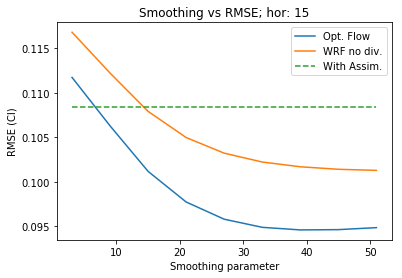

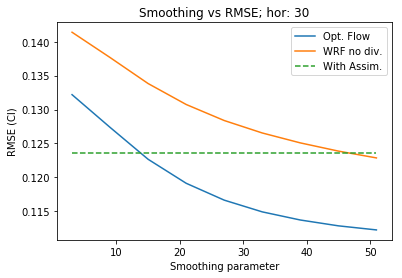

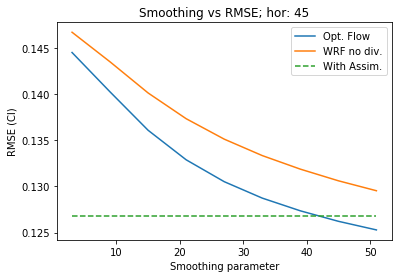

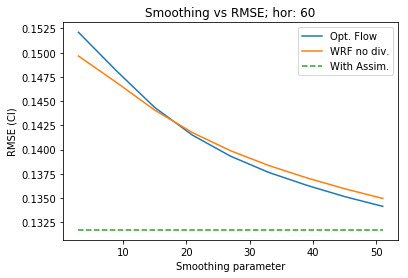

In [17]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_rmse.loc[hor])
    plt.plot(wrf_rmse.loc[hor])
    plt.plot(of_rmse.columns,
             owp_rmse.loc[hor].values
             * np.ones(of_rmse.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Smoothing vs RMSE; hor: {hor}')

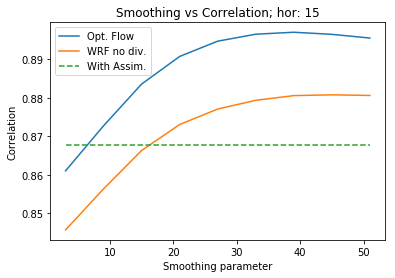

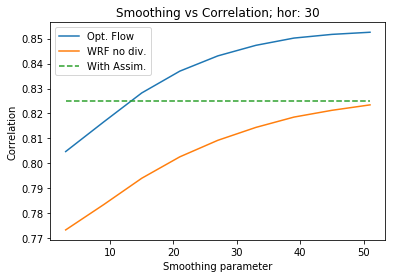

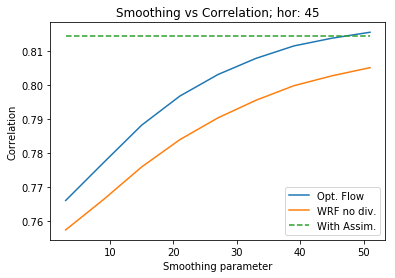

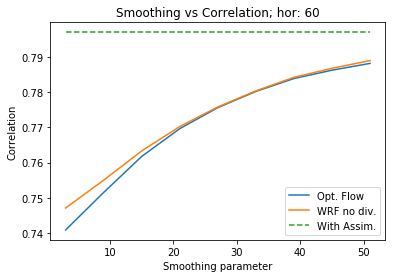

In [18]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_corr.loc[hor])
    plt.plot(wrf_corr.loc[hor])
    plt.plot(of_corr.columns,
             owp_corr.loc[hor].values
             * np.ones(of_corr.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Correlation; hor: {hor}')

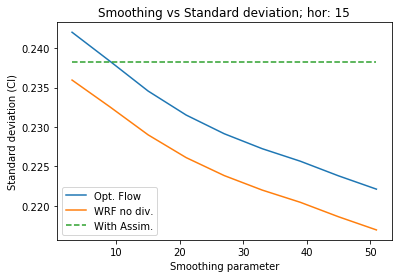

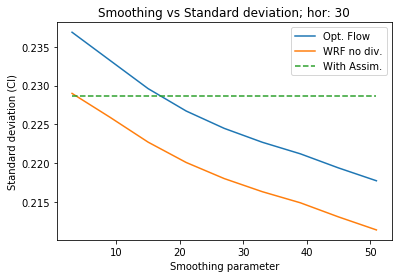

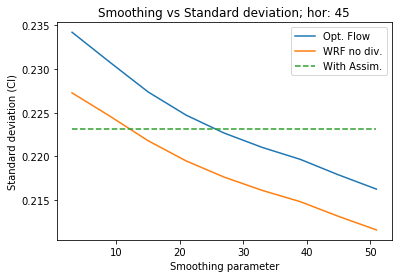

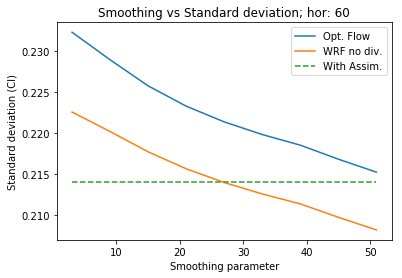

In [19]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor])
    plt.plot(wrf_sd.loc[hor])
    plt.plot(of_sd.columns,
             owp_sd.loc[hor].values
             * np.ones(of_sd.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Standard deviation (CI)')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

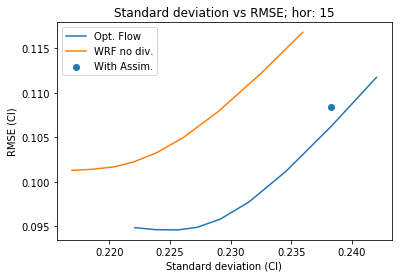

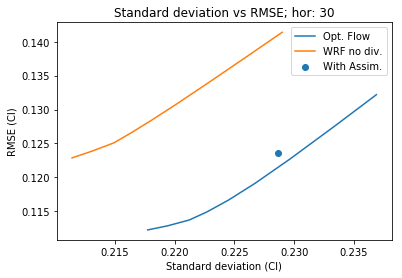

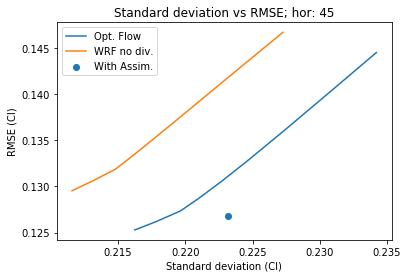

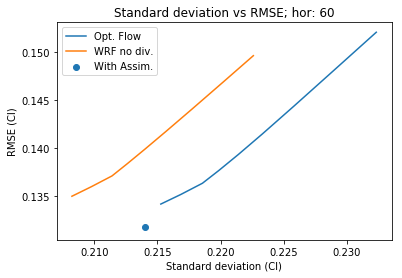

In [20]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_rmse.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_rmse.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_rmse.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Standard deviation vs RMSE; hor: {hor}')

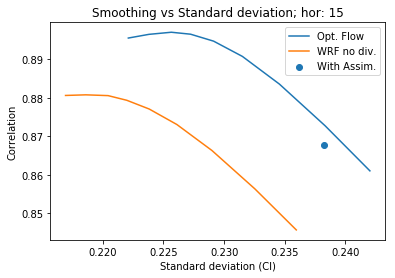

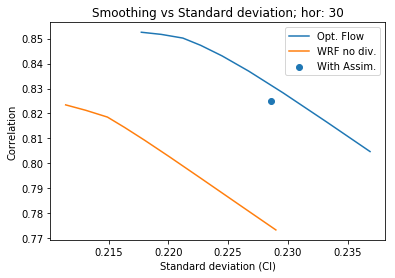

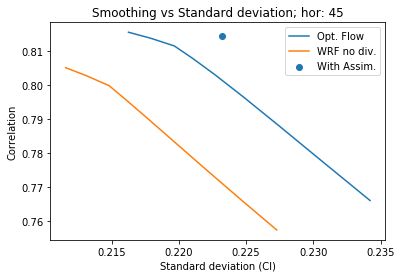

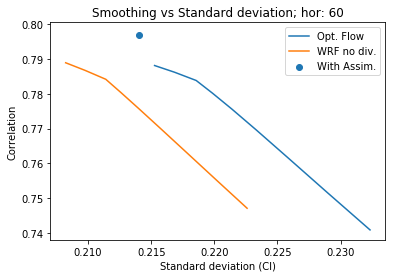

In [21]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_corr.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_corr.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_corr.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

In [22]:
one_of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=['rmse'])
one_of_corr = pd.DataFrame(index=[15, 30, 45, 60], columns=['correlation'])
one_of_sd = pd.DataFrame(index=[15, 30, 45, 60], columns=['forecast_sd'])
one_wrf_rmse = one_of_rmse.copy()
one_wrf_corr = one_of_corr.copy()
one_wrf_sd = one_of_sd.copy()
for hor in one_of_rmse.index:
    this_sd = owp_sd.loc[hor].values.item()
    to_minimize = np.abs(of_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    one_of_rmse.loc[hor] = of_rmse.loc[hor].iloc[optimal_index]
    one_of_corr.loc[hor] = of_corr.loc[hor].iloc[optimal_index]
    one_of_sd.loc[hor] = of_sd.loc[hor].iloc[optimal_index]
    
    to_minimize = np.abs(wrf_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    one_wrf_rmse.loc[hor] = wrf_rmse.loc[hor].iloc[optimal_index]
    one_wrf_corr.loc[hor] = wrf_corr.loc[hor].iloc[optimal_index]
    one_wrf_sd.loc[hor] = wrf_sd.loc[hor].iloc[optimal_index]

Text(0,0.5,'RMSE (CI)')

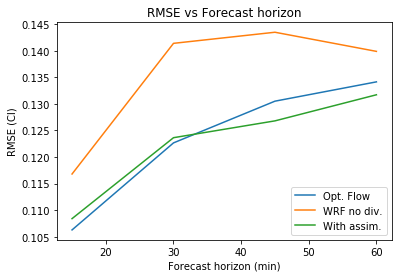

In [23]:
plt.figure()
plt.plot(one_of_rmse)
plt.plot(one_wrf_rmse)
plt.plot(owp_rmse.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('RMSE vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('RMSE (CI)')

Text(0,0.5,'Correlation')

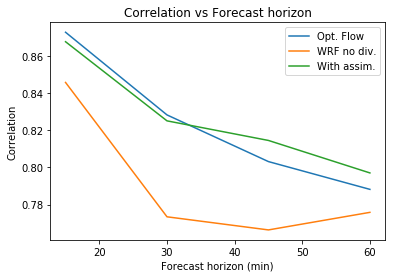

In [24]:
plt.figure()
plt.plot(one_of_corr)
plt.plot(one_wrf_corr)
plt.plot(owp_corr.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Correlation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Correlation')

Text(0,0.5,'Correlation')

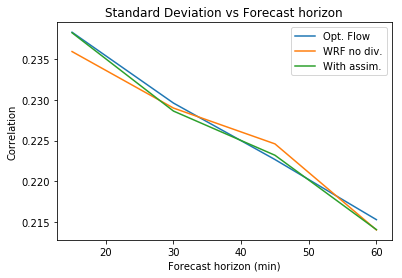

In [25]:
plt.figure()
plt.plot(one_of_sd)
plt.plot(one_wrf_sd)
plt.plot(owp_sd.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Standard Deviation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Correlation')

In [62]:
False ^ False

False

In [63]:
(smoothing_stats[0]['stat_times'] ^ error_stats[0]['stat_times']).sum()

15    0
30    0
45    0
60    0
dtype: int64

In [58]:
error_stats[0]['stat_times'].sum()

15    475
30    484
45    430
60    403
dtype: int64

In [64]:
runs = ['opt_flow', 'wrf_no_div', 'owp_opt', 'persistence']
directory_name = 'third_set_only_cloudy'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)
error_names = [
    arun['name']
    for arun in error_stats]

In [66]:
(error_stats[0]['stat_times']
 ^ error_stats[2]['stat_times']).sum()

15    0
30    0
45    0
60    0
dtype: int64

In [38]:
for this_stat in error_stats:
    if this_stat['name'] == 'owp_opt':
        owp_rmse = this_stat['rmse']
        owp_corr = this_stat['correlation']
        owp_sd = this_stat['forecast_sd']

In [39]:
smoothing_params = np.array([3, 9, 15, 21, 27, 33, 39, 45, 51])
# smoothing_runs = ['opt_flow', 'wrf_no_div']
# smoothing_params = np.array([27, 39, 51])
smoothing_runs = ['opt_flow', 'wrf_no_div']
these_smoothing_runs = []
for run in smoothing_runs:
    for this_param in smoothing_params:
        these_smoothing_runs.append(
            run + '_' + str(this_param))

In [40]:
directory_name = 'smoothing_runs_only_cloudy'
smoothing_stats = []
for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    smoothing_stats.append(adict)

In [41]:
smoothing_names = [
    arun['name']
    for arun in smoothing_stats]

In [42]:
of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=smoothing_params)
of_corr = of_rmse.copy()
of_sd = of_rmse.copy()
wrf_rmse = of_rmse.copy()
wrf_corr = of_rmse.copy()
wrf_sd = of_rmse.copy()

In [43]:
for this_stat in smoothing_stats:
    split_name = this_stat['name'].split('_')
    smoothing_param = int(split_name[-1])
    run_name = split_name[0]
    if run_name == 'wrf':
        wrf_rmse[smoothing_param] = this_stat['rmse']
        wrf_corr[smoothing_param] = this_stat['correlation']
        wrf_sd[smoothing_param] = this_stat['forecast_sd']
    elif run_name == 'opt':
        of_rmse[smoothing_param] = this_stat['rmse']
        of_corr[smoothing_param] = this_stat['correlation']
        of_sd[smoothing_param] = this_stat['forecast_sd']

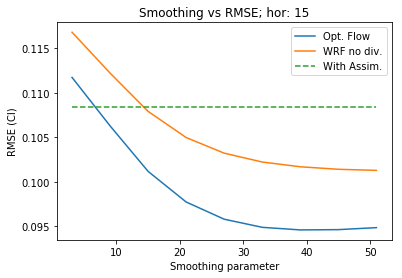

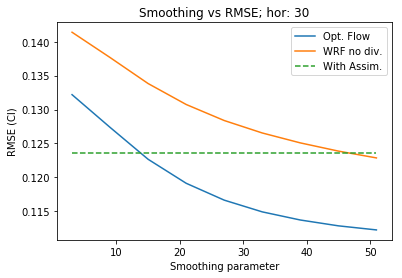

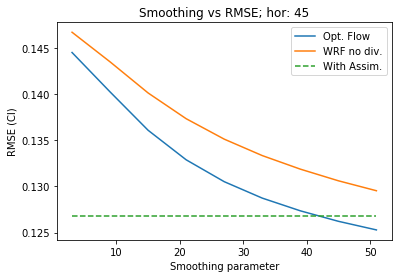

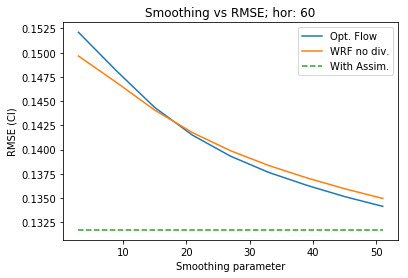

In [44]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_rmse.loc[hor])
    plt.plot(wrf_rmse.loc[hor])
    plt.plot(of_rmse.columns,
             owp_rmse.loc[hor].values
             * np.ones(of_rmse.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Smoothing vs RMSE; hor: {hor}')

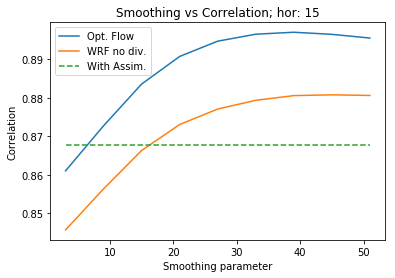

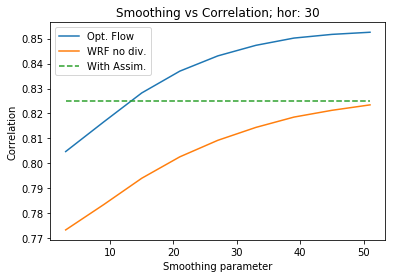

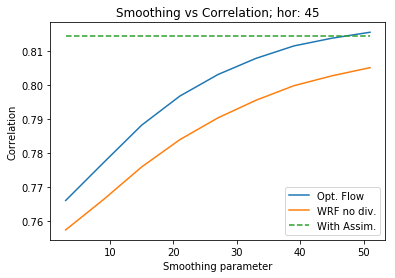

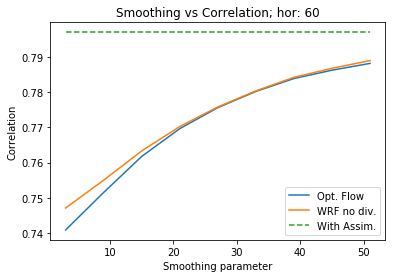

In [45]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_corr.loc[hor])
    plt.plot(wrf_corr.loc[hor])
    plt.plot(of_corr.columns,
             owp_corr.loc[hor].values
             * np.ones(of_corr.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Correlation; hor: {hor}')

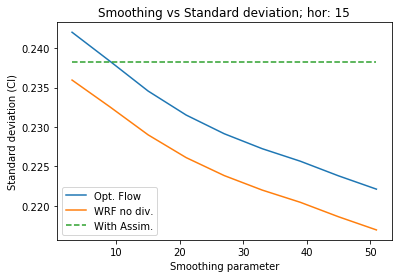

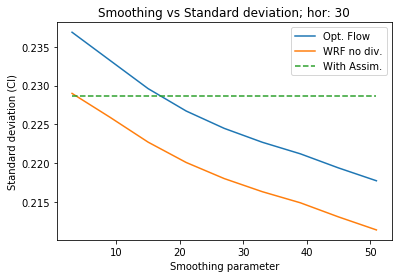

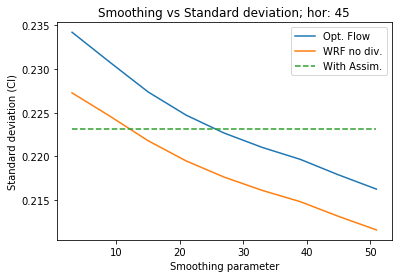

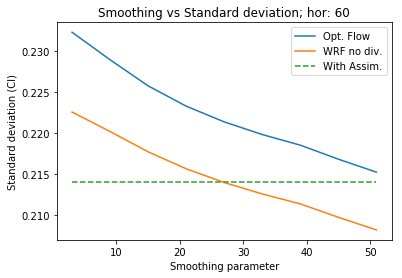

In [46]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor])
    plt.plot(wrf_sd.loc[hor])
    plt.plot(of_sd.columns,
             owp_sd.loc[hor].values
             * np.ones(of_sd.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Standard deviation (CI)')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

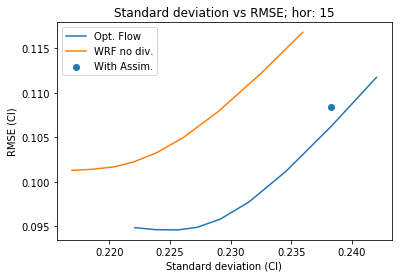

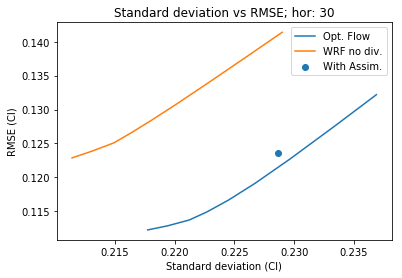

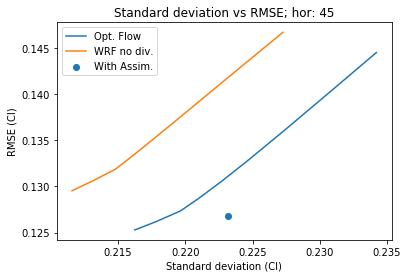

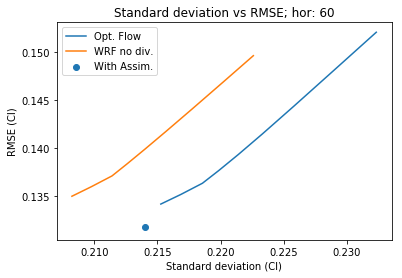

In [47]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_rmse.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_rmse.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_rmse.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Standard deviation vs RMSE; hor: {hor}')

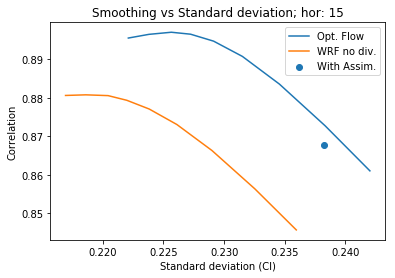

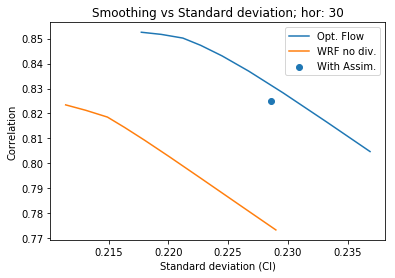

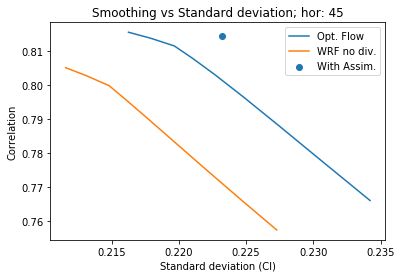

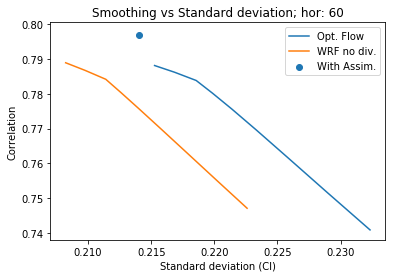

In [48]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_corr.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_corr.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_corr.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

In [49]:
one_of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=['rmse'])
one_of_corr = pd.DataFrame(index=[15, 30, 45, 60], columns=['correlation'])
one_of_sd = pd.DataFrame(index=[15, 30, 45, 60], columns=['forecast_sd'])
one_wrf_rmse = one_of_rmse.copy()
one_wrf_corr = one_of_corr.copy()
one_wrf_sd = one_of_sd.copy()
for hor in one_of_rmse.index:
    this_sd = owp_sd.loc[hor].values.item()
    to_minimize = np.abs(of_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    one_of_rmse.loc[hor] = of_rmse.loc[hor].iloc[optimal_index]
    one_of_corr.loc[hor] = of_corr.loc[hor].iloc[optimal_index]
    one_of_sd.loc[hor] = of_sd.loc[hor].iloc[optimal_index]
    
    to_minimize = np.abs(wrf_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    one_wrf_rmse.loc[hor] = wrf_rmse.loc[hor].iloc[optimal_index]
    one_wrf_corr.loc[hor] = wrf_corr.loc[hor].iloc[optimal_index]
    one_wrf_sd.loc[hor] = wrf_sd.loc[hor].iloc[optimal_index]

Text(0,0.5,'RMSE (CI)')

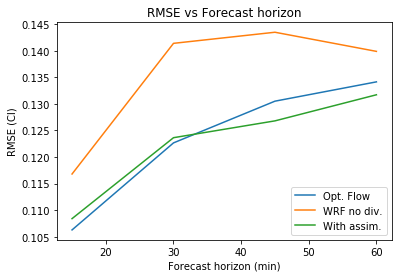

In [50]:
plt.figure()
plt.plot(one_of_rmse)
plt.plot(one_wrf_rmse)
plt.plot(owp_rmse.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('RMSE vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('RMSE (CI)')

Text(0,0.5,'Correlation')

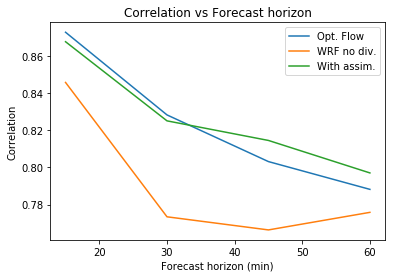

In [51]:
plt.figure()
plt.plot(one_of_corr)
plt.plot(one_wrf_corr)
plt.plot(owp_corr.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Correlation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Correlation')

Text(0,0.5,'Correlation')

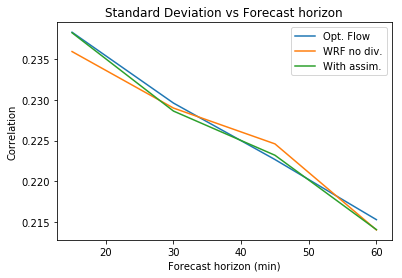

In [52]:
plt.figure()
plt.plot(one_of_sd)
plt.plot(one_wrf_sd)
plt.plot(owp_sd.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Standard Deviation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Correlation')

In [26]:
runs = ['opt_flow', 'wrf_no_div', 'owp_opt', 'persistence']
directory_name = 'third_set'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)
error_names = [
    arun['name']
    for arun in error_stats]

In [27]:
for this_stat in error_stats:
    if this_stat['name'] == 'owp_opt':
        owp_rmse = this_stat['rmse']
        owp_corr = this_stat['correlation']
        owp_sd = this_stat['forecast_sd']

In [44]:
smoothing_params = np.array(
    [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63])
# smoothing_runs = ['opt_flow', 'wrf_no_div']
# smoothing_params = np.array([27, 39, 51])
smoothing_runs = ['opt_flow', 'wrf_no_div']
these_smoothing_runs = []
for run in smoothing_runs:
    for this_param in smoothing_params:
        these_smoothing_runs.append(
            run + '_' + str(this_param))

In [45]:
directory_name = 'smoothing_runs'
smoothing_stats = []
for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    smoothing_stats.append(adict)

In [46]:
smoothing_names = [
    arun['name']
    for arun in smoothing_stats]

In [47]:
of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=smoothing_params)
of_corr = of_rmse.copy()
of_sd = of_rmse.copy()
wrf_rmse = of_rmse.copy()
wrf_corr = of_rmse.copy()
wrf_sd = of_rmse.copy()

In [48]:
this_stat.keys()

dict_keys(['name', 'rmse', 'forecast_sd', 'truth_sd', 'bias', 'correlation', 'stat_times'])

In [49]:
for this_stat in smoothing_stats:
    split_name = this_stat['name'].split('_')
    smoothing_param = int(split_name[-1])
    run_name = split_name[0]
    if run_name == 'wrf':
        wrf_rmse[smoothing_param] = this_stat['rmse']
        wrf_corr[smoothing_param] = this_stat['correlation']
        wrf_sd[smoothing_param] = this_stat['forecast_sd']
    elif run_name == 'opt':
        of_rmse[smoothing_param] = this_stat['rmse']
        of_corr[smoothing_param] = this_stat['correlation']
        of_sd[smoothing_param] = this_stat['forecast_sd']

In [50]:
this = owp_rmse.loc[15]
this.values

array([ 0.10841673])

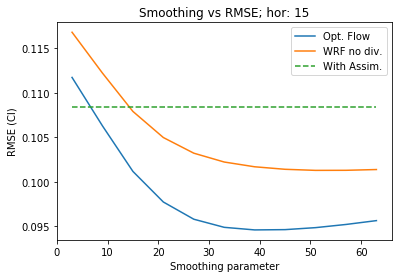

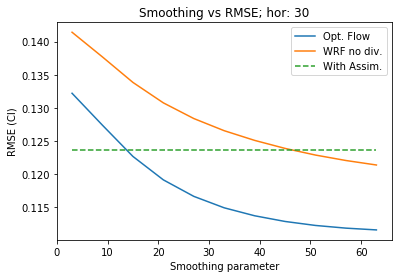

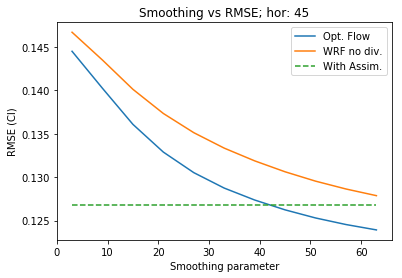

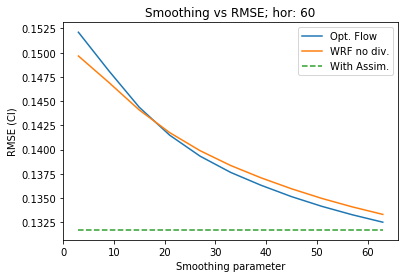

In [51]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_rmse.loc[hor])
    plt.plot(wrf_rmse.loc[hor])
    plt.plot(of_rmse.columns,
             owp_rmse.loc[hor].values
             * np.ones(of_rmse.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Smoothing vs RMSE; hor: {hor}')

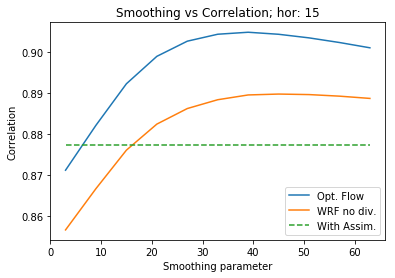

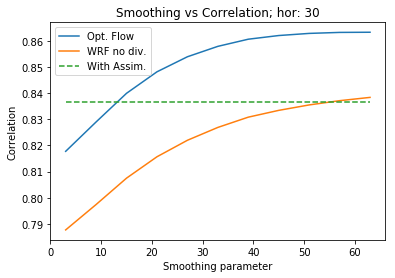

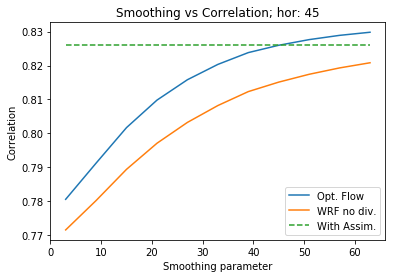

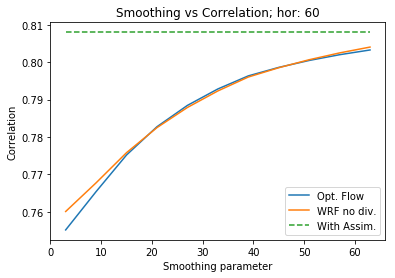

In [52]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_corr.loc[hor])
    plt.plot(wrf_corr.loc[hor])
    plt.plot(of_corr.columns,
             owp_corr.loc[hor].values
             * np.ones(of_corr.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Correlation; hor: {hor}')

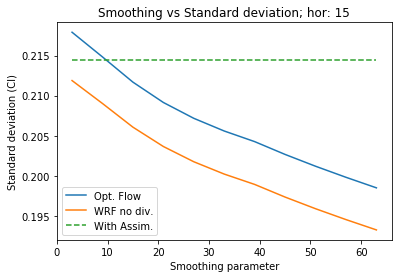

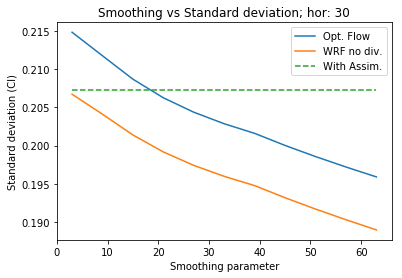

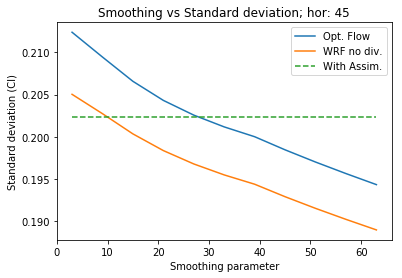

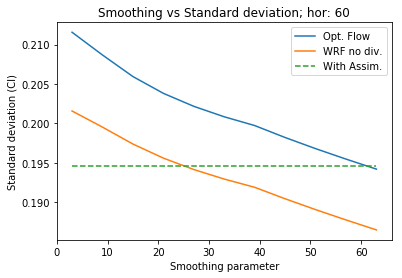

In [53]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor])
    plt.plot(wrf_sd.loc[hor])
    plt.plot(of_sd.columns,
             owp_sd.loc[hor].values
             * np.ones(of_sd.columns.size), '--')
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Smoothing parameter')
    plt.ylabel('Standard deviation (CI)')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

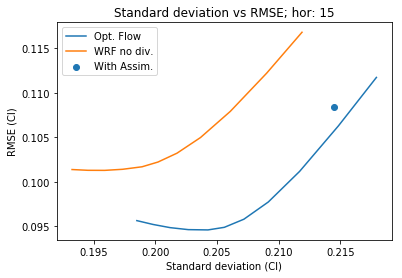

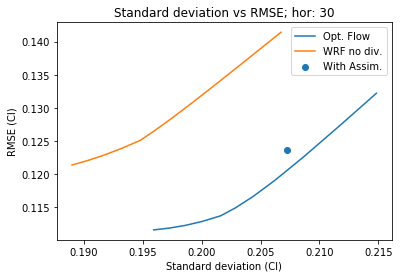

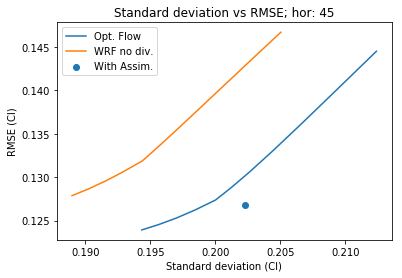

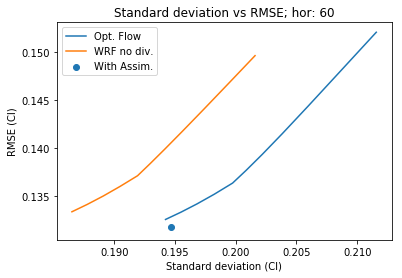

In [54]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_rmse.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_rmse.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_rmse.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('RMSE (CI)')
    plt.title(f'Standard deviation vs RMSE; hor: {hor}')

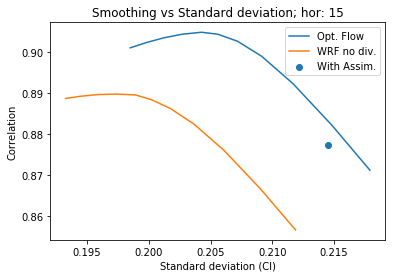

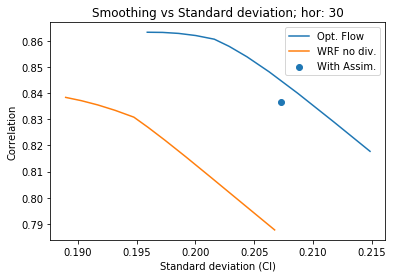

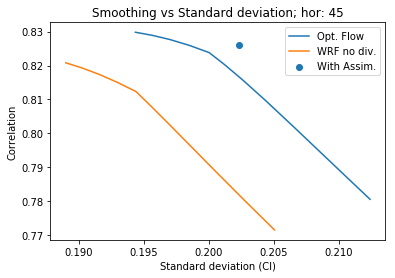

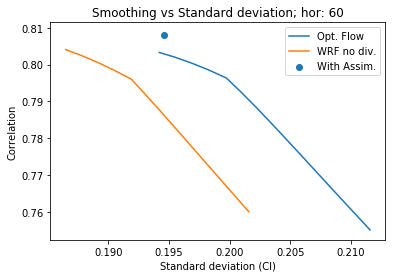

In [55]:
for hor in [15, 30, 45, 60]:
    plt.figure()
    plt.plot(of_sd.loc[hor].values, 
             of_corr.loc[hor].values)
    plt.plot(wrf_sd.loc[hor].values,
             wrf_corr.loc[hor].values)
    plt.scatter(owp_sd.loc[hor].values,
                owp_corr.loc[hor].values)
    plt.legend(['Opt. Flow',
                'WRF no div.',
                'With Assim.'])
    plt.xlabel('Standard deviation (CI)')
    plt.ylabel('Correlation')
    plt.title(f'Smoothing vs Standard deviation; hor: {hor}')

In [61]:
one_of_rmse = pd.DataFrame(index=[15, 30, 45, 60], columns=['rmse'])
one_of_corr = pd.DataFrame(index=[15, 30, 45, 60], columns=['correlation'])
one_of_sd = pd.DataFrame(index=[15, 30, 45, 60], columns=['forecast_sd'])
one_wrf_rmse = one_of_rmse.copy()
one_wrf_corr = one_of_corr.copy()
one_wrf_sd = one_of_sd.copy()
for hor in one_of_rmse.index:
    this_sd = owp_sd.loc[hor].values.item()
    to_minimize = np.abs(of_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    print(to_minimize[optimal_index]/this_sd)
    one_of_rmse.loc[hor] = of_rmse.loc[hor].iloc[optimal_index]
    one_of_corr.loc[hor] = of_corr.loc[hor].iloc[optimal_index]
    one_of_sd.loc[hor] = of_sd.loc[hor].iloc[optimal_index]
    
    to_minimize = np.abs(wrf_sd.loc[hor].values - this_sd)
    optimal_index = to_minimize.argmin()
    print(to_minimize[optimal_index]/this_sd)
    one_wrf_rmse.loc[hor] = wrf_rmse.loc[hor].iloc[optimal_index]
    one_wrf_corr.loc[hor] = wrf_corr.loc[hor].iloc[optimal_index]
    one_wrf_sd.loc[hor] = wrf_sd.loc[hor].iloc[optimal_index]

0.00150181391899
0.0122388120511
0.00492143655105
0.00265264829019
0.00126264174751
0.00210764790588
0.00217002366238
0.00244030087553


Text(0,0.5,'RMSE (CI)')

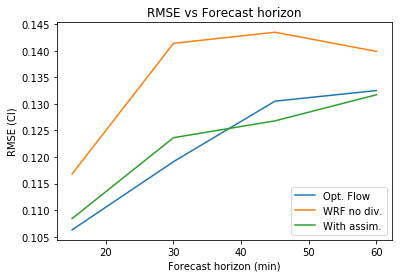

In [57]:
plt.figure()
plt.plot(one_of_rmse)
plt.plot(one_wrf_rmse)
plt.plot(owp_rmse.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('RMSE vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('RMSE (CI)')

Text(0,0.5,'Correlation')

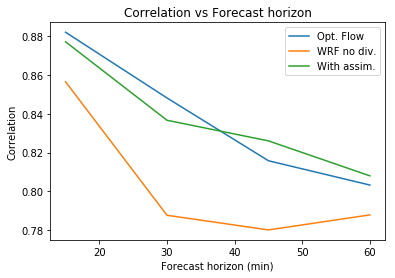

In [58]:
plt.figure()
plt.plot(one_of_corr)
plt.plot(one_wrf_corr)
plt.plot(owp_corr.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Correlation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Correlation')

Text(0,0.5,'Standard deviation (CI)')

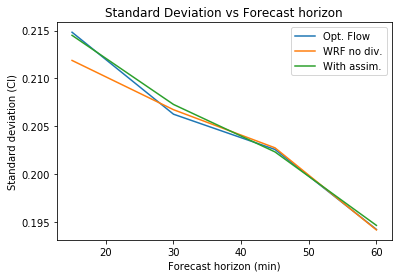

In [59]:
plt.figure()
plt.plot(one_of_sd)
plt.plot(one_wrf_sd)
plt.plot(owp_sd.loc[slice(15, None)])
plt.legend(['Opt. Flow',
            'WRF no div.',
            'With assim.'])
plt.title('Standard Deviation vs Forecast horizon')
plt.xlabel('Forecast horizon (min)')
plt.ylabel('Standard deviation (CI)')

# Print Errors & Generate TaylorDiagram

In [3]:
import seaborn as sns
cpal = sns.color_palette()

In [4]:
class TaylorDiagram(object):
    """Taylor diagram: plot model standard deviation and correlation
    to reference (data) sample in a single-quadrant polar plot, with
    r=stddev and theta=arccos(correlation).
    """

    def __init__(self, refstd, norm=False, fig=None, rect=111, label='_'):
        """Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using mpl_toolkits.axisartist.floating_axes. refstd is
        the reference standard deviation to be compared to.
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation
        self.std = refstd
        if norm:
            self.refstd = 1.0
            self.std = refstd
        self.norm = norm
        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = np.concatenate((np.arange(5)/5.,[0.95,0.99]))
        tlocs = np.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))

        # Standard deviation axis extent
        self.smin = 0
        self.smax = 2*self.refstd
        gl2 = GF.MaxNLocator(5)


        ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0, np.pi/2, # 1st quadrant
                                                     self.smin,self.smax),
                                           grid_locator1=gl1,
                                           grid_locator2=gl2,
                                           tick_formatter1=tf1,
                                           tick_formatter2=None
                                           )

        if fig is None:
            fig = plt.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True, ticks=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom") # "X axis"
        #ax.axis["left"].major_ticklabels.set_rotation(25)
        ax.axis["left"].label.set_text("Standard Deviation")
        #ax.axis["left"].label.update_bbox_position_size((1.3,1.0))


        ax.axis["right"].set_axis_direction("top")   # "Y axis"
        ax.axis["right"].toggle(ticklabels=True, label=True)
        ax.axis["right"].major_ticklabels.set_axis_direction("left")
        ax.axis["right"].label.set_text("Standard Deviation")

        ax.axis["bottom"].set_visible(False)         # Useless
        
        # Contours along standard deviations
        ax.grid(True)
        #ax.get_aux_axes(tr).grid(True)
        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates
        
        #self.ax.patch = ax.patch # for aux_ax to have a clip path as in ax
        ax.patch.zorder = 0.9

        # Add reference point and stddev contour
        print("Reference std:", self.refstd)
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label, zorder=3)
        t = np.linspace(0, np.pi/2)
        r = np.zeros_like(t) + self.refstd
        self.ax.plot(t,r, 'k--', label='_', zorder=3, alpha=0.6)

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """Add sample (stddev,corrcoeff) to the Taylor diagram. args
        and kwargs are directly propagated to the Figure.plot
        command."""
        
        if self.norm:
            stddev = stddev*1.0/self.std
        l, = self.ax.plot(np.arccos(corrcoef), stddev, zorder=5,
                          *args, **kwargs) # (theta,radius)
        self.samplePoints.append(l)

        return l

    def add_contours(self, levels=5, **kwargs):
        """Add constant centered RMS difference contours."""

        rs,ts = np.meshgrid(np.linspace(self.smin,self.smax),
                            np.linspace(0, np.pi/2))
        # Compute centered RMS difference
        rms = np.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*np.cos(ts))
        
        contours = self.ax.contour(ts, rs, rms, levels, zorder=4, **kwargs)
        self.ax.clabel(contours, inline=1, **kwargs)
        return contours
    
    def add_skill_contour(self, rms_val, **kwargs):
        rs,ts = np.meshgrid(np.linspace(self.smin,self.smax),
                            np.linspace(0, np.pi/2))
        # Compute centered RMS difference
        rms = np.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*np.cos(ts))
        
        contours = self.ax.contour(ts, rs, rms, rms_vals, **kwargs)

        return contours
    
    def add_corr_line(self, cor, **kwargs):
        acos = np.arccos(cor)
        line = self.ax.plot([0,acos], [0, self.smax], **kwargs)
        return line

In [5]:
def generate_taylor(returned, runs, normalized=True):
    fig = plt.figure(dpi=300)
    if normalized:
        sd_t = 1
        sd_t_array = returned[1]['truth_sd'].values.ravel()
    else:
        sd_t = returned[1]['truth_sd'].mean().item()
        sd_t_array = np.ones_like(returned[1]['truth_sd'].values.ravel())

    dia = TaylorDiagram(sd_t, norm=False, fig=fig, label='Observations')
    count = 0
    for run in runs:
        color = cpal[count]
        dia.add_sample(returned[count]['forecast_sd'].values.ravel()/sd_t_array,
                       returned[count]['correlation'].values.ravel(),
                       color=color, label=run + '_line')
        count += 1
#         dia.add_sample(sd_wrf.values.ravel(), corr_wrf.values.ravel(),
#                        color=cpal[2], label='wrf_line')

    horizons = [15, 30, 45, 60]
    marks = ['o', '^', 'd', 's']
    hor_count = 0
    for hor in horizons:
        count = 0
        for run in runs:
            color = cpal[count]
            mark = marks[hor_count]
            dia.add_sample(returned[count]['forecast_sd'].loc[hor]/sd_t_array[hor_count],
                           returned[count]['correlation'].loc[hor],
                           color=color, label=run, marker=mark)
            count += 1
        hor_count += 1
    
    if not normalized:
        mcount = 0
        for hor in horizons:
            color = 'k'
            mark = marks[mcount]
            dia.add_sample(returned[1]['truth_sd'].loc[hor],
                           [1],
                           color=color, label=run, marker=mark)
            mcount += 1
#     hor = 15
#     mark = 'o'
#     dia.add_sample(sd_ow.loc[hor], corr_ow.loc[hor], label='ow', marker=mark, color=cpal[4])
#     dia.add_sample(sd_wrf.loc[hor], corr_wrf.loc[hor], label='wrf', marker=mark, color=cpal[2])

#     hor = 30
#     mark = '^'
#     dia.add_sample(sd_ow.loc[hor], corr_ow.loc[hor], label='ow', marker=mark, color=cpal[4])
#     dia.add_sample(sd_wrf.loc[hor], corr_wrf.loc[hor], label='wrf', marker=mark, color=cpal[2])

#     hor = 45
#     mark = 'd'
#     dia.add_sample(sd_ow.loc[hor], corr_ow.loc[hor], label='ow', marker=mark, color=cpal[4])
#     dia.add_sample(sd_wrf.loc[hor], corr_wrf.loc[hor], label='wrf', marker=mark, color=cpal[2])

#     hor = 60
#     mark = 's'
#     dia.add_sample(sd_ow.loc[hor], corr_ow.loc[hor], label='ow', marker=mark, color=cpal[4])
#     dia.add_sample(sd_wrf.loc[hor], corr_wrf.loc[hor], label='wrf', marker=mark, color=cpal[2])

    dia.add_contours(5, colors='k', alpha=0.25, fontsize=8)
    samplePoints = dia.samplePoints[0:len(runs) + 1]
    fig.legend(samplePoints, ['obs'] + runs)


In [27]:
# runs = ['opt_flow', 'wrf', 'wrf_no_div', 'ow_15', 'owp_opt', 'persistence']
runs = ['opt_flow', 'wrf_no_div', 'owp_opt', 'persistence']

In [28]:
directory_name = 'third_set'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)

In [29]:
# smoothing_params = np.array([3, 9, 15, 21, 27, 33, 39, 45, 51])
# smoothing_runs = ['opt_flow', 'wrf_no_div']
smoothing_params = np.array([27, 39, 51])
smoothing_runs = ['opt_flow', 'wrf_no_div']
these_smoothing_runs = []
for run in smoothing_runs:
    for this_param in smoothing_params:
        these_smoothing_runs.append(
            run + '_' + str(this_param))

In [30]:
directory_name = 'smoothing_runs'

for run in these_smoothing_runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)

In [31]:
name_list = [
    arun['name']
    for arun in error_stats]
persistence = error_stats[
    name_list.index('persistence')]

In [32]:
stat='forecast_sd'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    print(these_errors['name'])
    print(these_errors['truth_sd'], '\n')
    print(these_errors[stat], '\n')
#     increase = (these_errors[stat].values
#                 - these_errors['truth_sd'].values)
#     percent_increase = increase/np.abs(these_errors['truth_sd']) * 100
#     this_legend.append(legend_dict[these_errors['name']])
#     plt.plot(percent_increase, linestyle='--', marker='.')

# increase = (persistence[stat].values
#             - persistence['truth_sd'].values)
# percent_increase = increase/np.abs(persistence['truth_sd'])
# this_legend.append(legend_dict['persistence'])
# plt.plot(percent_increase, linestyle='--', marker='.')

# plt.title('Percent increase in standard deviation')
# plt.ylabel('Percent increase in standard deviation')
# plt.xlabel('Time horizon (min)')
# plt.legend(this_legend)

forecast_sd
smoothing_runs
opt_flow
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167 

          sd
0   0.222200
15  0.218489
30  0.215423
45  0.212957
60  0.212150 

wrf_no_div
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167 

          sd
0   0.222200
15  0.212409
30  0.207206
45  0.205451
60  0.201954 

owp_opt
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167 

          sd
0   0.222200
15  0.214509
30  0.207281
45  0.202319
60  0.194635 

persistence
     true_sd
0   0.222200
15  0.221953
30  0.222176
45  0.222086
60  0.221167 

          sd
0   0.222200
15  0.221046
30  0.220868
45  0.220003
60  0.217769 

opt_flow_27
     true_sd
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
15  0.228134
30  0.223544
45  0.221590
60  0.220074 

opt_flow_39
     true_sd
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
15  0.224666
30  0.220285
45  0.218600
60  0.217261 

o

In [33]:
# improvements for rmse
stat='rmse'
print(stat)
print(directory_name)
for these_errors in error_stats:
    
    print(these_errors['name'] + '\n')
    
    print(these_errors[stat], '\n')
    
    if these_errors['name'] == 'persistence':
        continue
    print(these_errors['name'] + '\n')
    decrease = (persistence[stat]
                - these_errors[stat])
    percent_decrease = decrease/persistence[stat]
    print('Percent decrease')
    print(percent_decrease, '\n')
    skill_score = (1 - these_errors[stat]/persistence[stat]) * 100
    print('Skill Score')
    print(skill_score, '\n')

rmse
smoothing_runs
opt_flow

            rmse
0   5.882707e-09
15  1.127897e-01
30  1.331196e-01
45  1.453242e-01
60  1.529031e-01 

opt_flow

Percent decrease
        rmse
0       -inf
15  0.088876
30  0.071620
45  0.053268
60  0.030065 

Skill Score
        rmse
0       -inf
15  8.887581
30  7.162038
45  5.326798
60  3.006476 

wrf_no_div

            rmse
0   5.882707e-09
15  1.176884e-01
30  1.420766e-01
45  1.472657e-01
60  1.501500e-01 

wrf_no_div

Percent decrease
        rmse
0       -inf
15  0.049304
30  0.009154
45  0.040620
60  0.047529 

Skill Score
        rmse
0       -inf
15  4.930370
30  0.915415
45  4.061983
60  4.752934 

owp_opt

            rmse
0   3.548495e-08
15  1.084167e-01
30  1.236451e-01
45  1.268104e-01
60  1.317196e-01 

owp_opt

Percent decrease
        rmse
0       -inf
15  0.124201
30  0.137696
45  0.173878
60  0.164442 

Skill Score
         rmse
0        -inf
15  12.420078
30  13.769562
45  17.387835
60  16.444174 

persistence

        rmse
0   0.0

In [34]:
# improvements for correlation
stat = 'correlation'
print(stat)
print(directory_name, '\n')

for these_errors in error_stats:
    print(these_errors['name'] + '\n')
    
    print(these_errors[stat], '\n')
    
    if these_errors['name'] == 'persistence':
        continue
    increase = (these_errors[stat]
                - persistence[stat])
    percent_increase = (increase/np.abs(persistence[stat])) * 100
    print('Percent increase')
    print(percent_increase, '\n')

correlation
smoothing_runs 

opt_flow

    correlation
0      1.000000
15     0.868965
30     0.815604
45     0.778449
60     0.753109 

Percent increase
     correlation
0  -1.554312e-12
15  2.971956e+00
30  3.143291e+00
45  2.508326e+00
60  1.357503e+00 

wrf_no_div

    correlation
0      1.000000
15     0.854607
30     0.785935
45     0.769930
60     0.758698 

Percent increase
     correlation
0  -1.554312e-12
15  1.270611e+00
30 -6.087613e-01
45  1.386542e+00
60  2.109785e+00 

owp_opt

    correlation
0      1.000000
15     0.877147
30     0.836684
45     0.826053
60     0.808019 

Percent increase
     correlation
0  -2.875478e-12
15  3.941522e+00
30  5.809128e+00
45  8.777001e+00
60  8.747586e+00 

persistence

    correlation
0      1.000000
15     0.843885
30     0.790749
45     0.759401
60     0.743022 

opt_flow_27

    correlation
15     0.894761
30     0.843233
45     0.803302
60     0.775959 

Percent increase
    correlation
0           NaN
15     6.028807
30     6.637

In [35]:
legend_dict = {'opt_flow': 'Dense opt. flow',
               'persistence': 'Persistence',
               'radiosonde': 'Radiosonde',
               'wrf': 'WRF',
               'wrf_no_div': 'WRF no div.',
               'ow_15': 'WRF & opt. flow',
               'owp_opt': 'WRF, opt. flow, & wind pert.'}

rmse
smoothing_runs


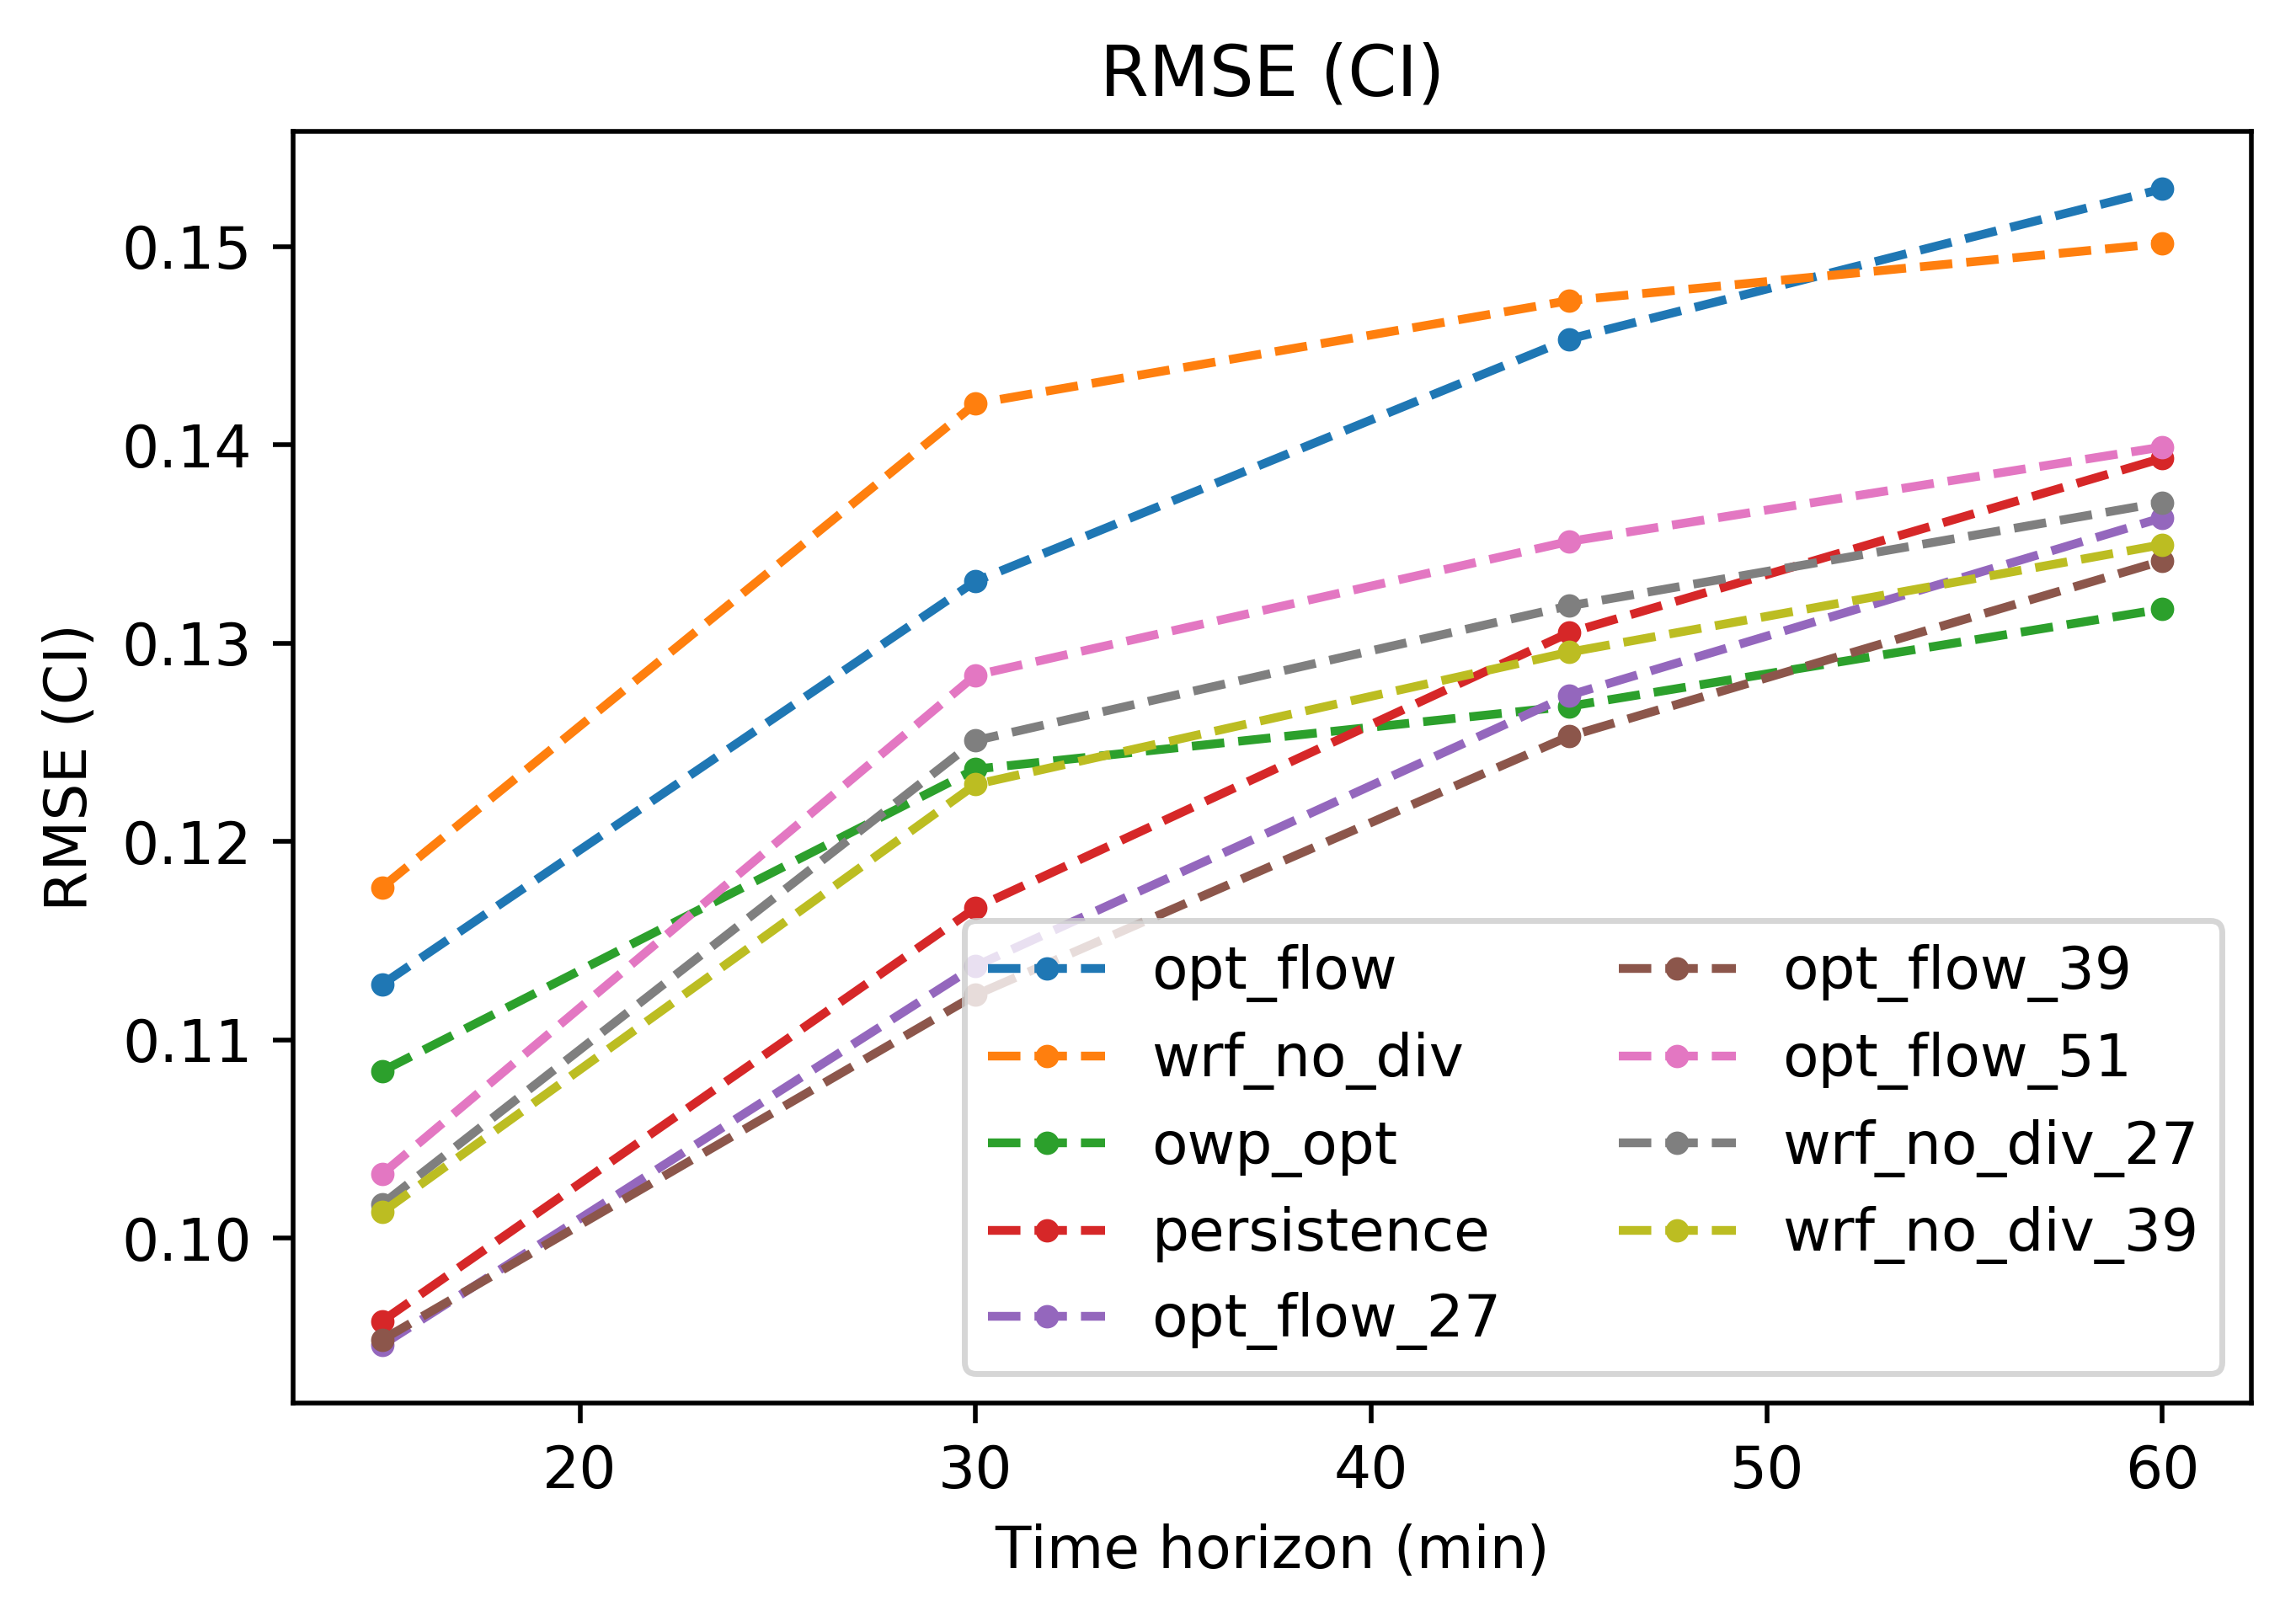

In [41]:
stat='rmse'
this_legend = []
print(stat)
print(directory_name)
plt.figure(dpi=500)
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue   
#     this_legend.append(legend_dict[these_errors['name']])
    plt.plot(these_errors[stat].loc[slice(15, None)], linestyle='--', marker='.')
plt.title('RMSE (CI)')
plt.ylabel('RMSE (CI)')
plt.xlabel('Time horizon (min)')
# plt.legend(this_legend)
plt.legend(name_list, ncol=2)
#     print('Percent decrease')
#     print(percent_decrease, '\n')

rmse
smoothing_runs


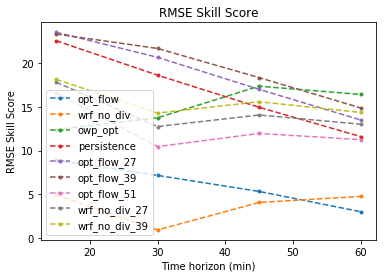

In [37]:
stat='rmse'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue
    skill_score = (1 - these_errors[stat]/persistence[stat])*100    
#     this_legend.append(legend_dict[these_errors['name']])
    plt.plot(skill_score, linestyle='--', marker='.')
plt.title('RMSE Skill Score')
plt.ylabel('RMSE Skill Score')
plt.xlabel('Time horizon (min)')
# plt.legend(this_legend)
plt.legend(name_list)
#     print('Percent decrease')
#     print(percent_decrease, '\n')

In [38]:
# stat='correlation'
# these_runs = []
# print(stat)
# print(directory_name)
# plt.figure()
# for these_errors in error_stats:
#     if these_errors['name'] == 'persistence':
#         continue
#     increase = (these_errors[stat]
#                 - persistence[stat])
#     percent_increase = increase/np.abs(persistence[stat])
#     these_runs.append(these_errors['name'])
#     plt.plot(percent_increase, linestyle='--', marker='.')
# plt.title('Percent increase of correlation (persistence as reference)')
# plt.ylabel('Correlation')
# plt.xlabel('Time horizon (min)')
# plt.legend(these_runs)
# #     print('Percent decrease')
# #     print(percent_decrease, '\n')

In [39]:
[this_errors['name'] for this_errors in error_stats]

['opt_flow',
 'wrf_no_div',
 'owp_opt',
 'persistence',
 'opt_flow_27',
 'opt_flow_39',
 'opt_flow_51',
 'wrf_no_div_27',
 'wrf_no_div_39',
 'wrf_no_div_51']

forecast_sd
smoothing_runs


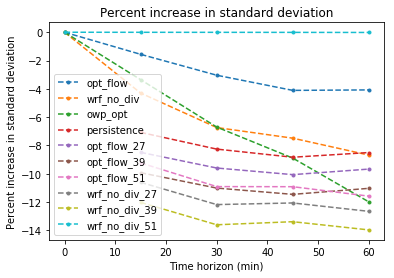

In [40]:
stat='forecast_sd'
marks = ['o', '^', 'd', 's']
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue
    increase = (these_errors[stat].values
                - these_errors['truth_sd'].values)
    percent_increase = increase/np.abs(these_errors['truth_sd']) * 100
#     this_legend.append(legend_dict[these_errors['name']])
    plt.plot(percent_increase, linestyle='--', marker='.')

increase = (persistence[stat].values
            - persistence['truth_sd'].values)
percent_increase = increase/np.abs(persistence['truth_sd'])
# this_legend.append(legend_dict['persistence'])
plt.plot(percent_increase, linestyle='--', marker='.')

plt.title('Percent increase in standard deviation')
plt.ylabel('Percent increase in standard deviation')
plt.xlabel('Time horizon (min)')
# plt.legend(this_legend)
plt.legend(name_list)

In [24]:
[legend_dict[arun] for arun in runs]

['Dense opt. flow',
 'WRF',
 'WRF no div.',
 'WRF & opt. flow',
 'WRF, opt. flow, & wind pert.',
 'Persistence']

smoothing_runs
Reference std: 1


/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'fontsize'
  s)


(0.6, 1.1)

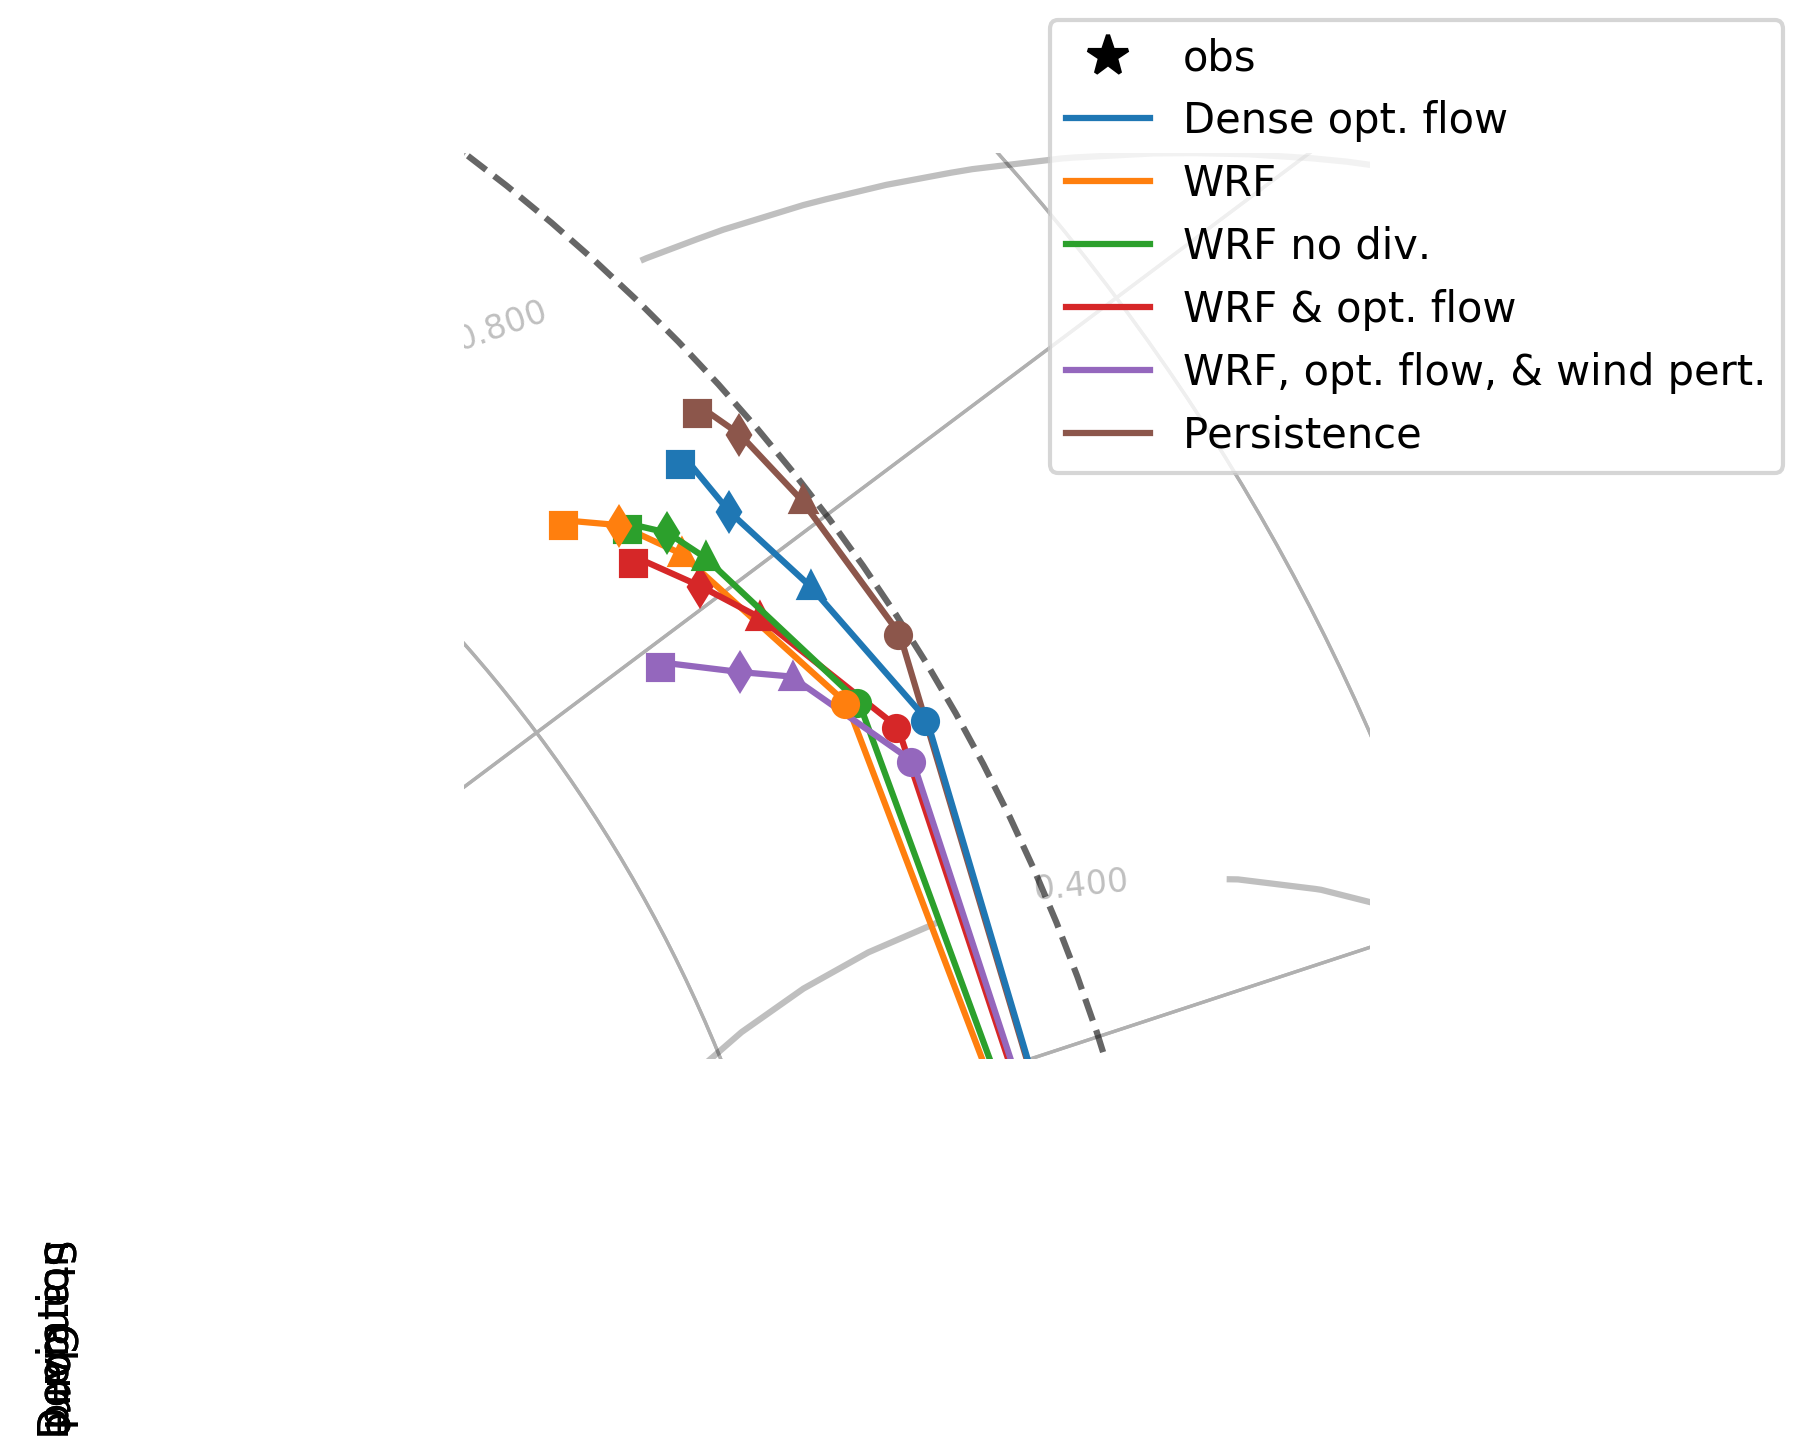

In [25]:
print(directory_name)
# this_error_stats = [e]
generate_taylor(error_stats, [legend_dict[arun] for arun in runs])
plt.ylim([.3, .8])
plt.xlim([.6, 1.1])

smoothing_runs
Reference std: 1


/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'fontsize'
  s)


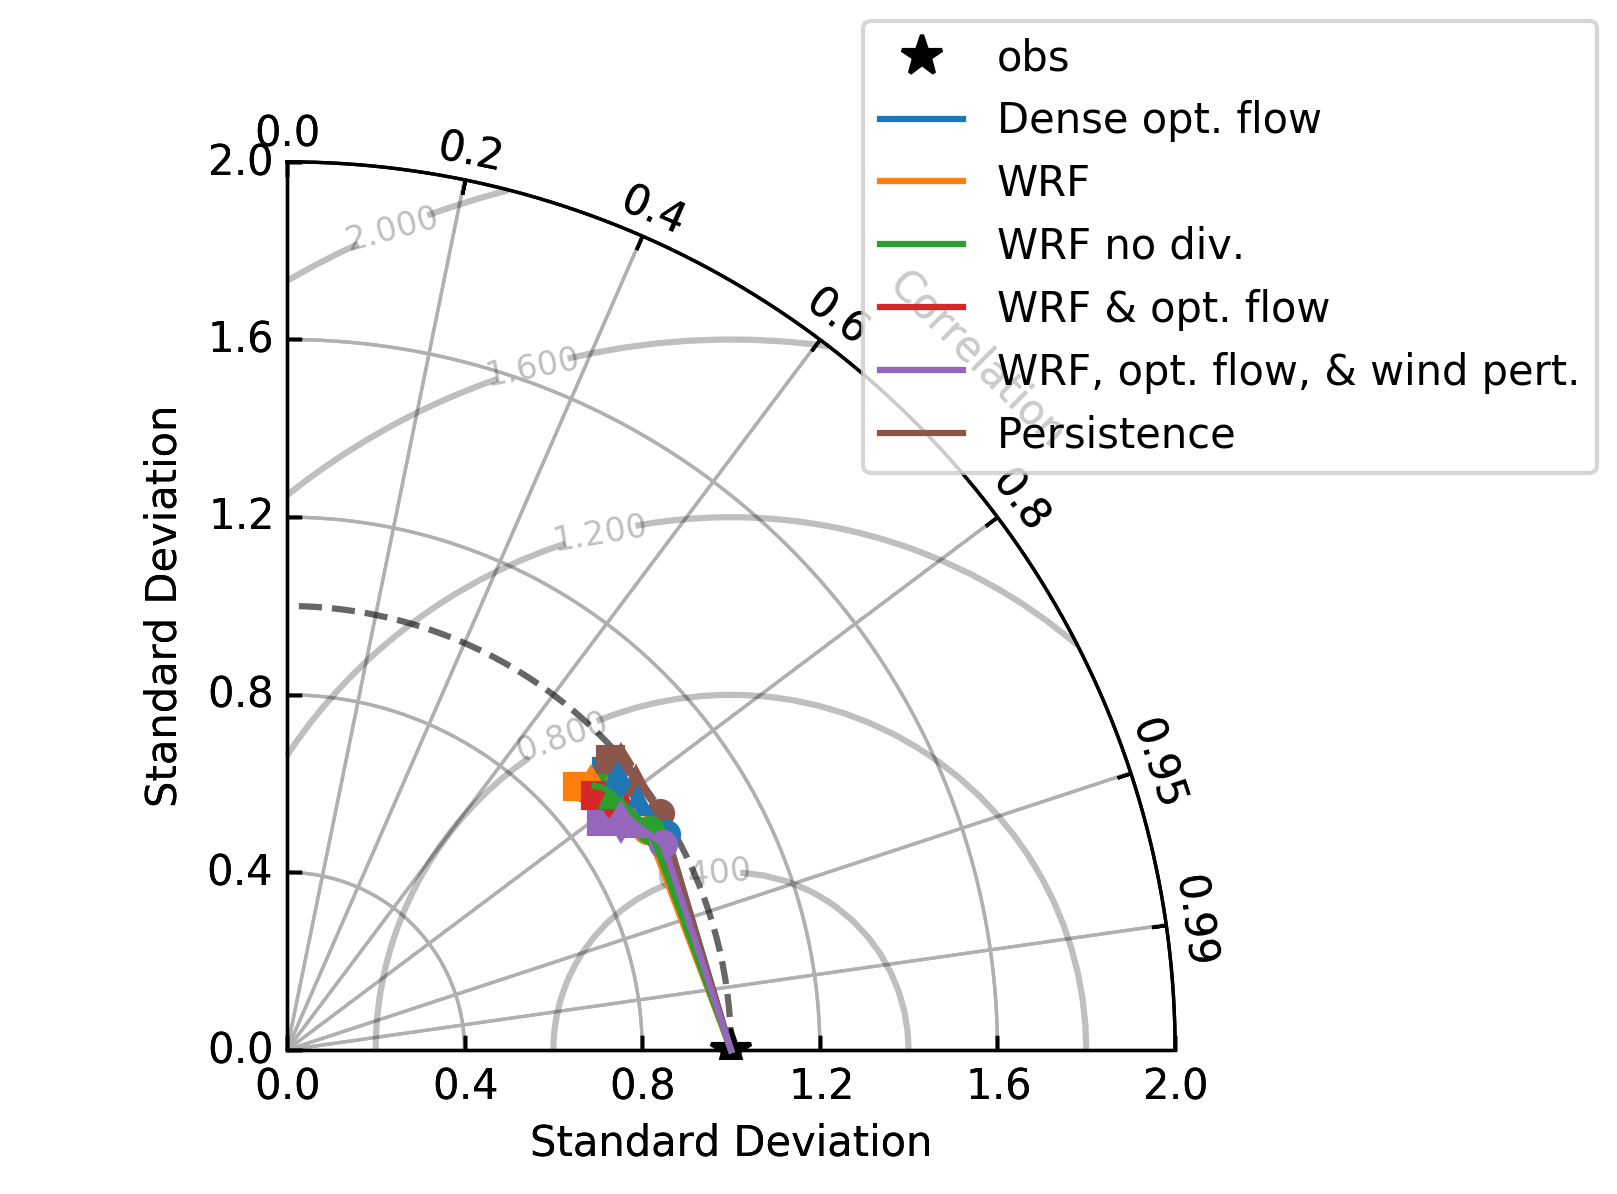

In [26]:
print(directory_name)
generate_taylor(error_stats, [legend_dict[arun] for arun in runs])

In [153]:
runs = ['opt_flow', 'wrf', 'wrf_no_div', 'ow_15', 'owp_opt', 'persistence']
# runs = ['opt_flow', 'wrf_no_div', 'owp_opt', 'persistence']

In [154]:
directory_name = 'third_set_only_cloudy'
error_stats = []
for run in runs:
    load_directory = ('/a2/uaren/travis/'
                      + 'results/multi_day_error/'
                      + f'{directory_name}/{run}')
    adict = {'name': run}
    for stat_file in os.listdir(load_directory):
        stat_name = stat_file.split('.')[0]
        stat_file = os.path.join(load_directory,
                                 stat_file)
        adict[stat_name] = pd.read_hdf(stat_file)
    error_stats.append(adict)

In [155]:
name_list = [
    arun['name']
    for arun in error_stats]
persistence = error_stats[
    name_list.index('persistence')]

In [156]:
stat='forecast_sd'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    print(these_errors['name'])
    print(these_errors['truth_sd'], '\n')
    print(these_errors[stat], '\n')
#     increase = (these_errors[stat].values
#                 - these_errors['truth_sd'].values)
#     percent_increase = increase/np.abs(these_errors['truth_sd']) * 100
#     this_legend.append(legend_dict[these_errors['name']])
#     plt.plot(percent_increase, linestyle='--', marker='.')

# increase = (persistence[stat].values
#             - persistence['truth_sd'].values)
# percent_increase = increase/np.abs(persistence['truth_sd'])
# this_legend.append(legend_dict['persistence'])
# plt.plot(percent_increase, linestyle='--', marker='.')

# plt.title('Percent increase in standard deviation')
# plt.ylabel('Percent increase in standard deviation')
# plt.xlabel('Time horizon (min)')
# plt.legend(this_legend)

forecast_sd
third_set_only_cloudy
opt_flow
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.241631
30  0.236541
45  0.233736
60  0.231584 

wrf
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.234021
30  0.226328
45  0.222270
60  0.215364 

wrf_no_div
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.235517
30  0.228545
45  0.226601
60  0.221598 

ow_15
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.237894
30  0.228925
45  0.224833
60  0.218482 

owp_opt
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.237220
30  0.227674
45  0.222121
60  0.212753 

persistence
     true_sd
0   0.245719
15  0.245516
30  0.243678
45  0.243072
60  0.240530 

          sd
0   0.245719
15  0.2447

In [157]:
# improvements for rmse
stat='rmse'
print(stat)
print(directory_name)
for these_errors in error_stats:
    
    print(these_errors['name'] + '\n')
    
    print(these_errors[stat], '\n')
    
    if these_errors['name'] == 'persistence':
        continue
    print(these_errors['name'] + '\n')
    decrease = (persistence[stat]
                - these_errors[stat])
    percent_decrease = decrease/persistence[stat]
    print('Percent decrease')
    print(percent_decrease, '\n')
    skill_score = (1 - these_errors[stat]/persistence[stat]) * 100
    print('Skill Score')
    print(skill_score, '\n')

rmse
third_set_only_cloudy
opt_flow

            rmse
0   5.882707e-09
15  1.127897e-01
30  1.331196e-01
45  1.453242e-01
60  1.529031e-01 

opt_flow

Percent decrease
        rmse
0       -inf
15  0.205698
30  0.182283
45  0.163713
60  0.135094 

Skill Score
         rmse
0        -inf
15  20.569800
30  18.228335
45  16.371272
60  13.509393 

wrf

            rmse
0   5.882707e-09
15  1.180776e-01
30  1.439065e-01
45  1.508971e-01
60  1.546007e-01 

wrf

Percent decrease
        rmse
0       -inf
15  0.168459
30  0.116022
45  0.131643
60  0.125492 

Skill Score
         rmse
0        -inf
15  16.845893
30  11.602224
45  13.164304
60  12.549152 

wrf_no_div

            rmse
0   5.882707e-09
15  1.176884e-01
30  1.420766e-01
45  1.472657e-01
60  1.501500e-01 

wrf_no_div

Percent decrease
        rmse
0       -inf
15  0.171200
30  0.127263
45  0.152540
60  0.150667 

Skill Score
         rmse
0        -inf
15  17.119974
30  12.726310
45  15.254009
60  15.066737 

ow_15

            rms

In [158]:
# improvements for correlation
stat = 'correlation'
print(stat)
print(directory_name, '\n')

for these_errors in error_stats:
    print(these_errors['name'] + '\n')
    
    print(these_errors[stat], '\n')
    
    if these_errors['name'] == 'persistence':
        continue
    increase = (these_errors[stat]
                - persistence[stat])
    percent_increase = (increase/np.abs(persistence[stat])) * 100
    print('Percent increase')
    print(percent_increase, '\n')

correlation
third_set_only_cloudy 

opt_flow

    correlation
0      1.000000
15     0.858876
30     0.802699
45     0.764094
60     0.739169 

Percent increase
     correlation
0   1.110223e-14
15  3.192907e+00
30  3.394313e+00
45  2.762439e+00
60  1.550256e+00 

wrf

    correlation
0      1.000000
15     0.842228
30     0.764612
45     0.740621
60     0.726186 

Percent increase
     correlation
0   1.110223e-14
15  1.192759e+00
30 -1.511551e+00
45 -3.944500e-01
60 -2.333932e-01 

wrf_no_div

    correlation
0      1.000000
15     0.843832
30     0.771820
45     0.755930
60     0.746042 

Percent increase
     correlation
0   1.110223e-14
15  1.385454e+00
30 -5.830801e-01
45  1.664485e+00
60  2.494534e+00 

ow_15

    correlation
0      1.000000
15     0.856601
30     0.801378
45     0.779652
60     0.756839 

Percent increase
     correlation
0  -2.431388e-12
15  2.919633e+00
30  3.224243e+00
45  4.854782e+00
60  3.977937e+00 

owp_opt

    correlation
0      1.000000
15     0.8677

In [159]:
legend_dict = {'opt_flow': 'Dense opt. flow',
               'persistence': 'Persistence',
               'radiosonde': 'Radiosonde',
               'wrf': 'WRF',
               'wrf_no_div': 'WRF no div.',
               'ow_15': 'WRF & opt. flow',
               'owp_opt': 'WRF, opt. flow, & wind pert.'}

rmse
third_set_only_cloudy


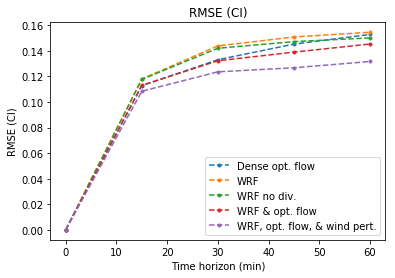

In [160]:
stat='rmse'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue   
    this_legend.append(legend_dict[these_errors['name']])
    plt.plot(these_errors[stat], linestyle='--', marker='.')
plt.title('RMSE (CI)')
plt.ylabel('RMSE (CI)')
plt.xlabel('Time horizon (min)')
plt.legend(this_legend)
#     print('Percent decrease')
#     print(percent_decrease, '\n')

rmse
third_set_only_cloudy


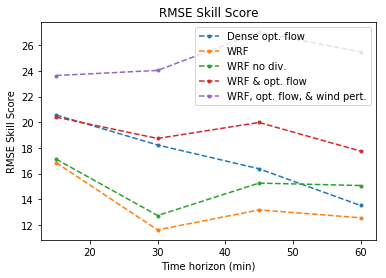

In [161]:
stat='rmse'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue
    skill_score = (1 - these_errors[stat]/persistence[stat])*100    
    this_legend.append(legend_dict[these_errors['name']])
    plt.plot(skill_score, linestyle='--', marker='.')
plt.title('RMSE Skill Score')
plt.ylabel('RMSE Skill Score')
plt.xlabel('Time horizon (min)')
plt.legend(this_legend)
#     print('Percent decrease')
#     print(percent_decrease, '\n')

In [162]:
# stat='correlation'
# these_runs = []
# print(stat)
# print(directory_name)
# plt.figure()
# for these_errors in error_stats:
#     if these_errors['name'] == 'persistence':
#         continue
#     increase = (these_errors[stat]
#                 - persistence[stat])
#     percent_increase = increase/np.abs(persistence[stat])
#     these_runs.append(these_errors['name'])
#     plt.plot(percent_increase, linestyle='--', marker='.')
# plt.title('Percent increase of correlation (persistence as reference)')
# plt.ylabel('Correlation')
# plt.xlabel('Time horizon (min)')
# plt.legend(these_runs)
# #     print('Percent decrease')
# #     print(percent_decrease, '\n')

In [163]:
[this_errors['name'] for this_errors in error_stats]

['opt_flow', 'wrf', 'wrf_no_div', 'ow_15', 'owp_opt', 'persistence']

forecast_sd
third_set_only_cloudy


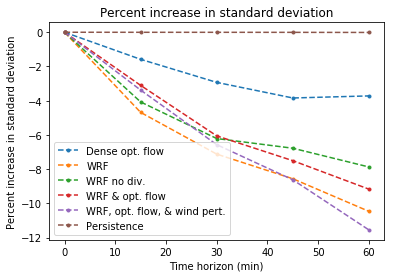

In [164]:
stat='forecast_sd'
this_legend = []
print(stat)
print(directory_name)
plt.figure()
for these_errors in error_stats:
    if these_errors['name'] in ['persistence', 'radiosonde']:
        continue
    increase = (these_errors[stat].values
                - these_errors['truth_sd'].values)
    percent_increase = increase/np.abs(these_errors['truth_sd']) * 100
    this_legend.append(legend_dict[these_errors['name']])
    plt.plot(percent_increase, linestyle='--', marker='.')

increase = (persistence[stat].values
            - persistence['truth_sd'].values)
percent_increase = increase/np.abs(persistence['truth_sd'])
this_legend.append(legend_dict['persistence'])
plt.plot(percent_increase, linestyle='--', marker='.')

plt.title('Percent increase in standard deviation')
plt.ylabel('Percent increase in standard deviation')
plt.xlabel('Time horizon (min)')
plt.legend(this_legend)

In [165]:
[legend_dict[arun] for arun in runs]

['Dense opt. flow',
 'WRF',
 'WRF no div.',
 'WRF & opt. flow',
 'WRF, opt. flow, & wind pert.',
 'Persistence']

third_set_only_cloudy
Reference std: 1


/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'fontsize'
  s)


(0.6, 1.1)

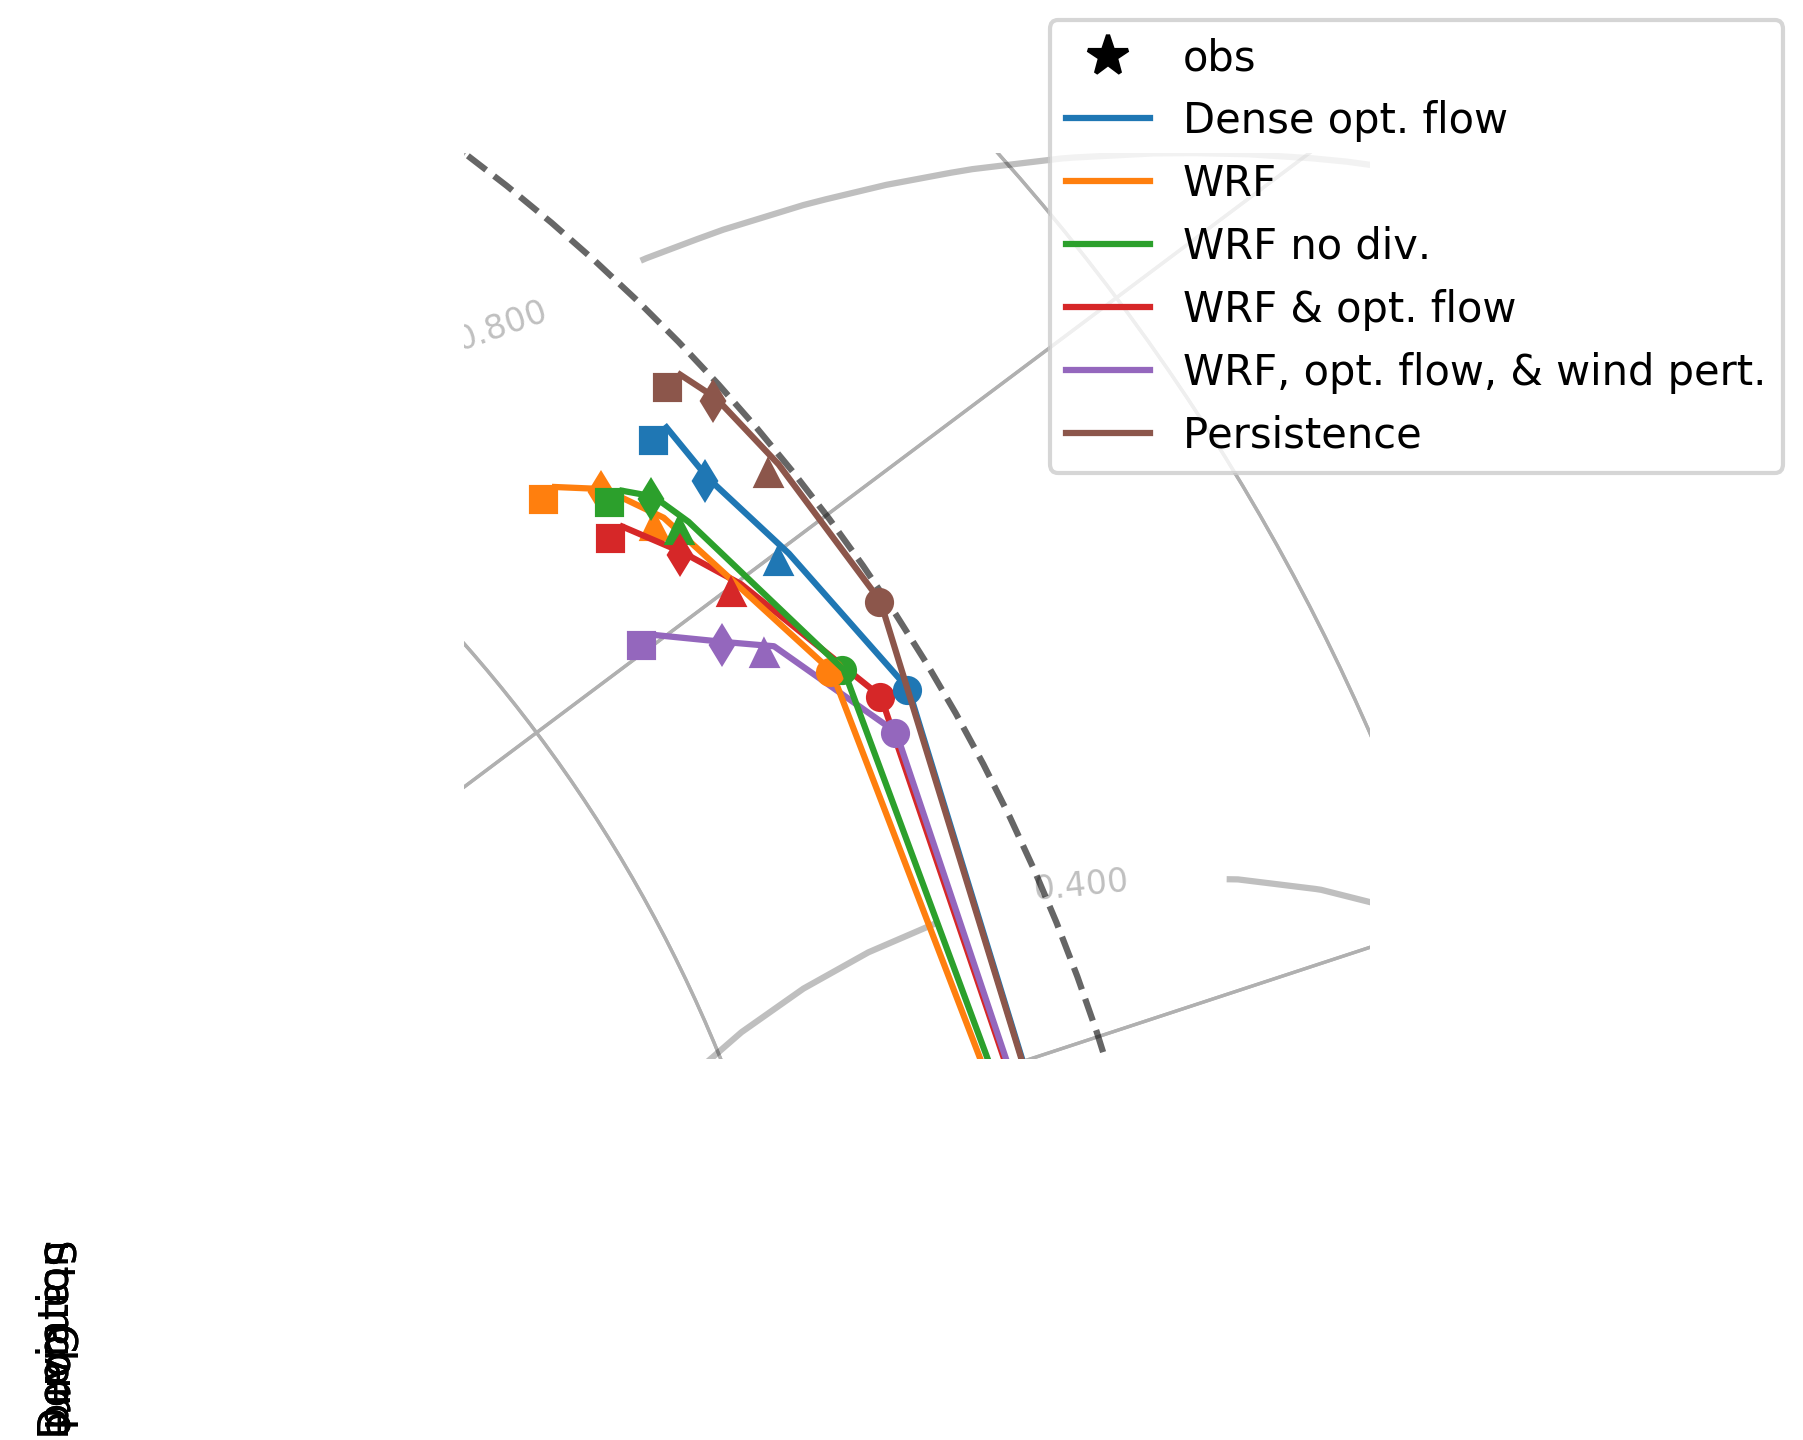

In [166]:
print(directory_name)
# this_error_stats = [e]
generate_taylor(error_stats, [legend_dict[arun] for arun in runs])
plt.ylim([.3, .8])
plt.xlim([.6, 1.1])

third_set_only_cloudy
Reference std: 1


/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'fontsize'
  s)


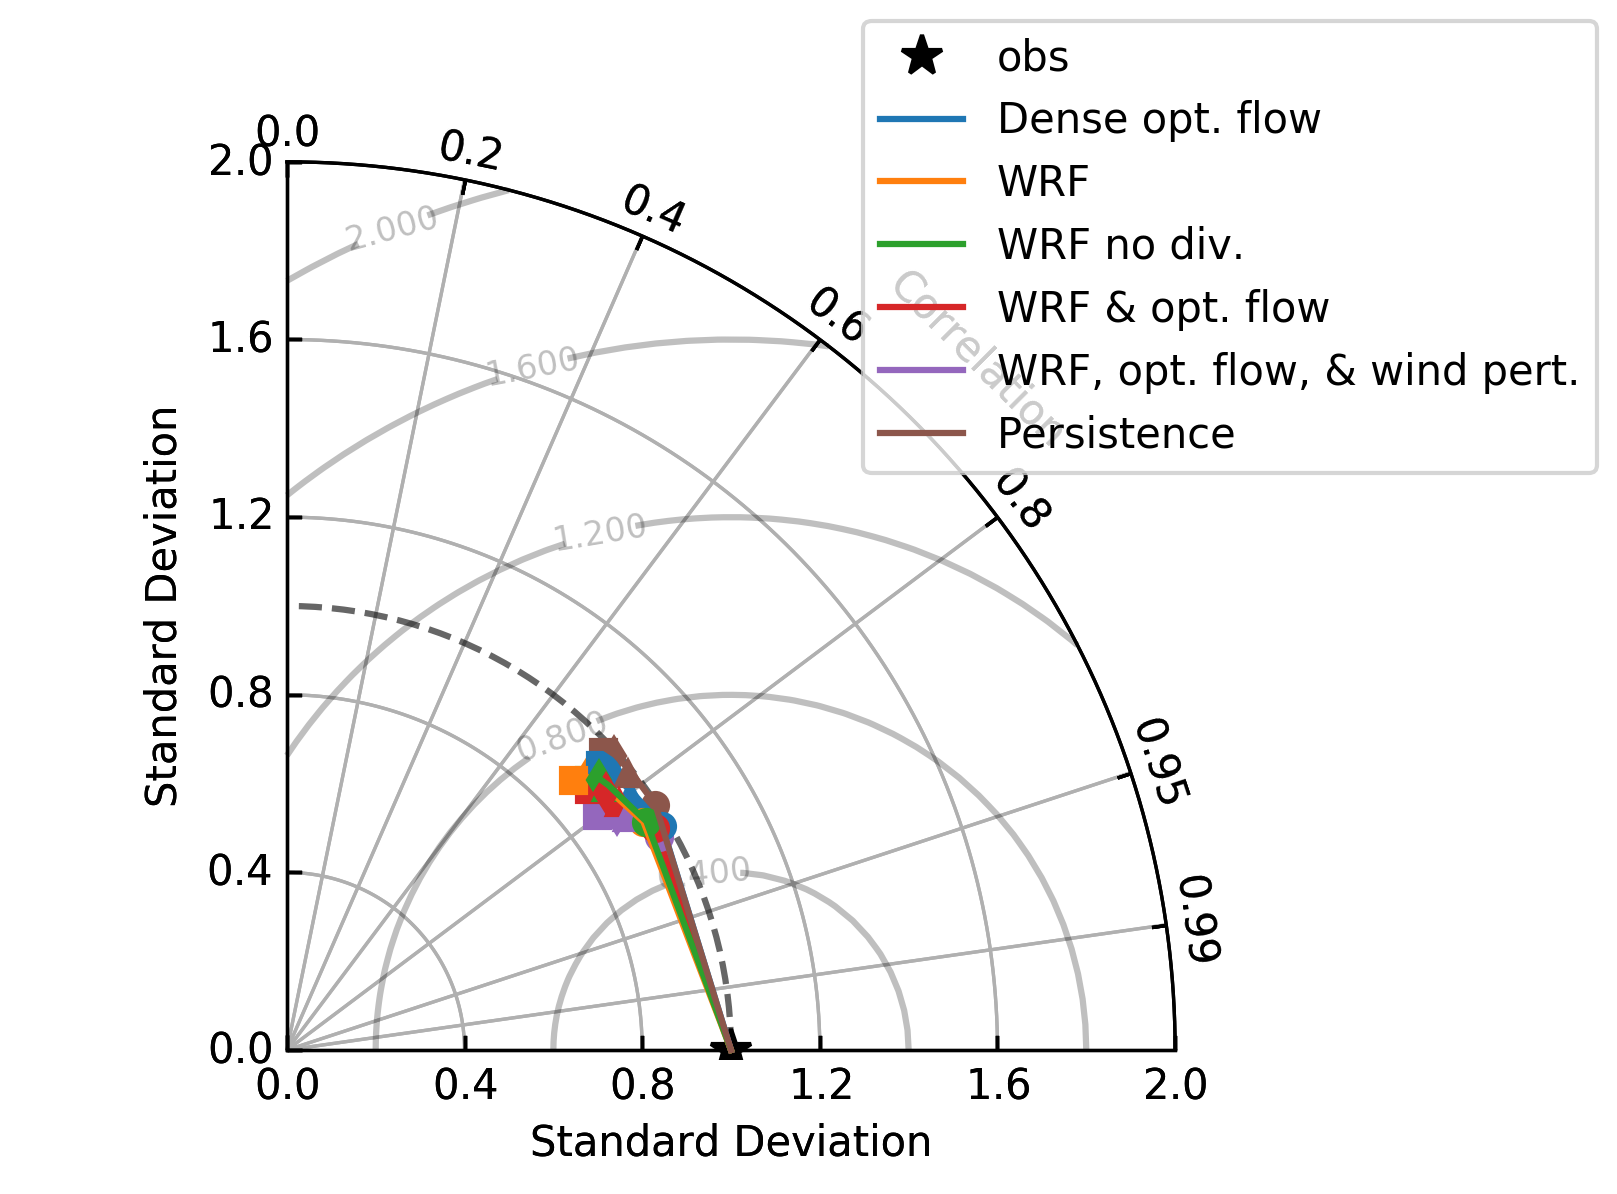

In [167]:
print(directory_name)
generate_taylor(error_stats, [legend_dict[arun] for arun in runs])